In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
import plotly.express as px
import seaborn as sns
import plotly.subplots
#from sklearn.preprocessing import LabelEncoder
from scipy.stats import pearsonr

In [2]:
# DATA PREPARATION FOR HRC - Honduran Red Cross (second survey)
# In this simple case, we have only one team so country=Honduras is not needed
# STEP 1: Group teams into centers and sectors
# Load the dataframe
file_path = "Individual.csv"
df = pd.read_csv(file_path, sep=",", encoding='utf-8')

Team='Voluntariado Cruz Roja Hondureña'

# Filter the dataframe for team
df = df[df['Team Name'] == Team]
df.info()


#Export cleaned team data to CSV file
df.to_csv(f'{Team}.csv', index=False)


<class 'pandas.core.frame.DataFrame'>
Index: 351 entries, 8680 to 9030
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Team Name         351 non-null    object 
 1   Survey Data       351 non-null    object 
 2   Well-being        351 non-null    float64
 3   Needs             351 non-null    float64
 4   Engagement        351 non-null    float64
 5   Autonomy          351 non-null    float64
 6   Belonging         351 non-null    float64
 7   Competence        351 non-null    float64
 8   Leadership        351 non-null    float64
 9   Management        351 non-null    float64
 10  Returns           351 non-null    float64
 11  Rewards           351 non-null    float64
 12  Status            351 non-null    float64
 13  Myself            351 non-null    int64  
 14  Tasks             351 non-null    int64  
 15  Free              351 non-null    int64  
 16  Mastery           351 non-null    int64  
 17

351 7220 7571


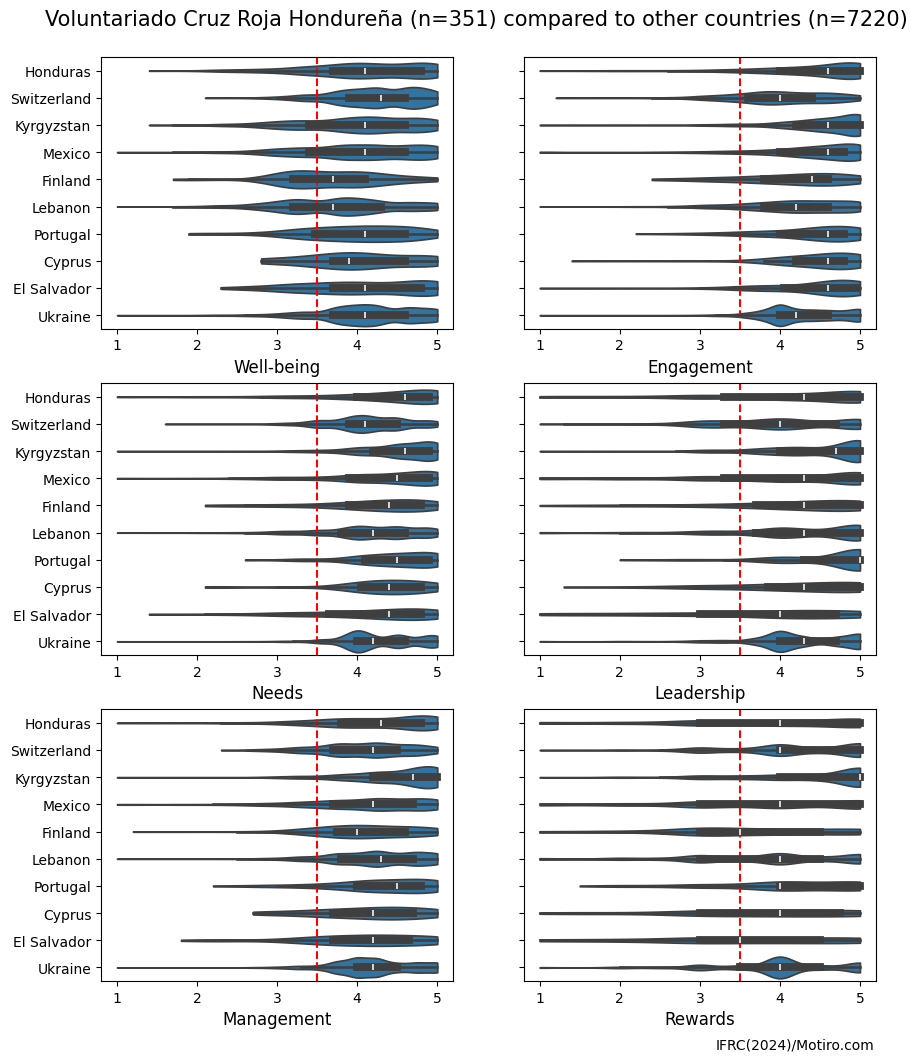

In [5]:
# Compare team with volunteer benchmarks from other countries or teams
file_path = "Individual.csv"
df = pd.read_csv(file_path, sep=",", encoding='utf-8')

# Filter the dataframe for 'Position' = 'Volunteer'
VOL_df = df[df['Position'] == 'Volunteer'].copy()

# Get the DataFrame for the team from Honduras
HRC_df = pd.read_csv(f'{Team}.csv', sep=",", encoding='utf-8')

# Count the number of volunteers from Honduras
n_HRC = HRC_df['Volunteer'].sum()

# Filter the DataFrame for selected countries with many volunteers
Country_df = VOL_df[VOL_df['Country'].isin(['Ukraine', 'Lebanon', 'Mexico', 'El Salvador', 'Portugal', 'Kyrgyzstan', 'Finland', 'Cyprus', 'Switzerland'])].copy()

# Count the number of volunteers from the other countries
n_country = Country_df['Volunteer'].sum()

# Total sample for the graphs:
n = n_HRC + n_country

print(n_HRC, n_country, n)

# Merge the two dataframes
HRC_df = pd.concat([HRC_df, Country_df], ignore_index=True)

# Violin plots by team for selected variables
variables = [
    'Well-being',
    'Engagement',
    'Needs',
    'Leadership',
    'Management',
    'Rewards'
]

# Create a 3x2 grid of subplots sharing the same x-axis and y-axis
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 12), sharex=False, sharey=True)

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, x_var in enumerate(variables):
    ax = axes[i]  # Get the current subplot
    ax.axvline(x=3.5, color='red', linestyle='--')
    ax = sns.violinplot(
        data=HRC_df, x=x_var,
        y='Country',  # Replace team name with circle to group HRC teams
        cut=0, ax=ax)
    ax.set_ylabel('')
    ax.set_xlabel(x_var, fontsize=12)  # Change y value

plt.suptitle(f'{Team} (n={n_HRC}) compared to other countries (n={n_country})', x=0.5, y=0.92, fontsize=15)
plt.text(3.2, 12, "IFRC(2024)/Motiro.com", fontdict={'size': 10})

plt.savefig(f'{Team}_countries.png', bbox_inches='tight', pad_inches=0.1)

351 7220 7571


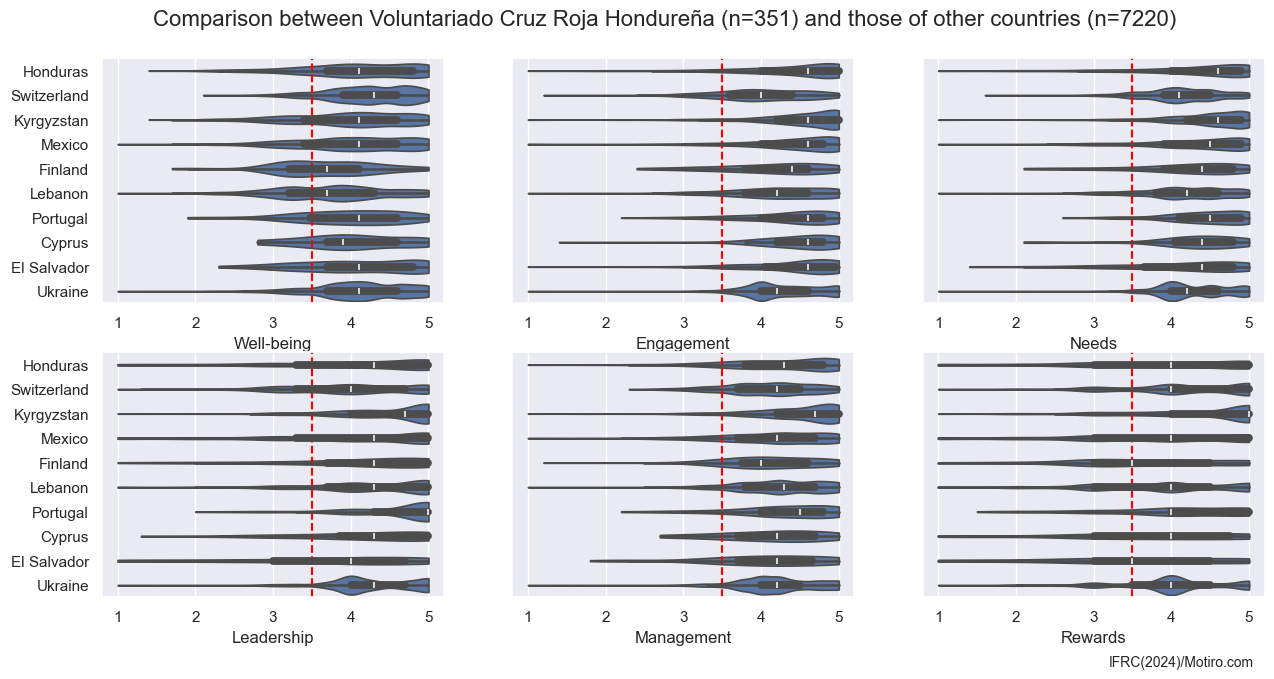

In [50]:
# SLIDE. Compare URC with volunteer benchmaks from other countries
file_path = "Individual.csv"
df = pd.read_csv(file_path, sep=",", encoding='utf-8')

# Filter the dataframe for 'Position' = 'Volunteer'
VOL_df = df[df['Position'] == 'Volunteer'].copy()

# Get the DataFrame for the team from Honduras
HRC_df = pd.read_csv(f'{Team}.csv', sep=",", encoding='utf-8')

# Count the number of volunteers from Honduras
n_HRC = HRC_df['Volunteer'].sum()

# Filter the DataFrame for selected countries with many volunteers
Country_df = VOL_df[VOL_df['Country'].isin(['Ukraine', 'Lebanon', 'Mexico', 'El Salvador', 'Portugal', 'Kyrgyzstan', 'Finland', 'Cyprus', 'Switzerland'])].copy()

#count the number of volunteers from the other countries
n_country =  Country_df['Volunteer'].sum()

#total sample for the graphs:
n = n_HRC + n_country

print(n_HRC, n_country, n)

# Merge the two dataframes
HRC_df = pd.concat([HRC_df, Country_df], ignore_index=True)

# violin plots by team for selected variables
variables = [
    ('Well-being'),
    ('Engagement'),
    ('Needs'),
    ('Leadership'),
    ('Management'),
    ('Rewards')
    ]

# Create a 3x2 grid of subplots sharing the same x-axis and y-axis
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 7), sharex=False, sharey=True)

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, (x_var) in enumerate(variables):
    ax = axes[i]  # Get the current subplot
    ax.axvline(x=3.5, color='red', linestyle='--')
    ax=sns.violinplot(
        data=HRC_df, x=x_var,
        y='Country', #replace team name with circle to group URC teams
        cut=0, ax=ax)
    ax.set_ylabel('')
    ax.set_xlabel(x_var, fontsize=12, x=0.5, y=100) # Change y value
        
plt.suptitle(f"Comparison between {Team} (n={n_HRC}) and those of other countries (n={n_country})", 
             x=0.5, y=0.95, fontsize=16)
plt.text(3.2, 12.3, "IFRC(2024)/Motiro.com", fontdict={'size': 10})

plt.savefig(f'{Team}_slide.png', bbox_inches='tight', pad_inches=0.1)

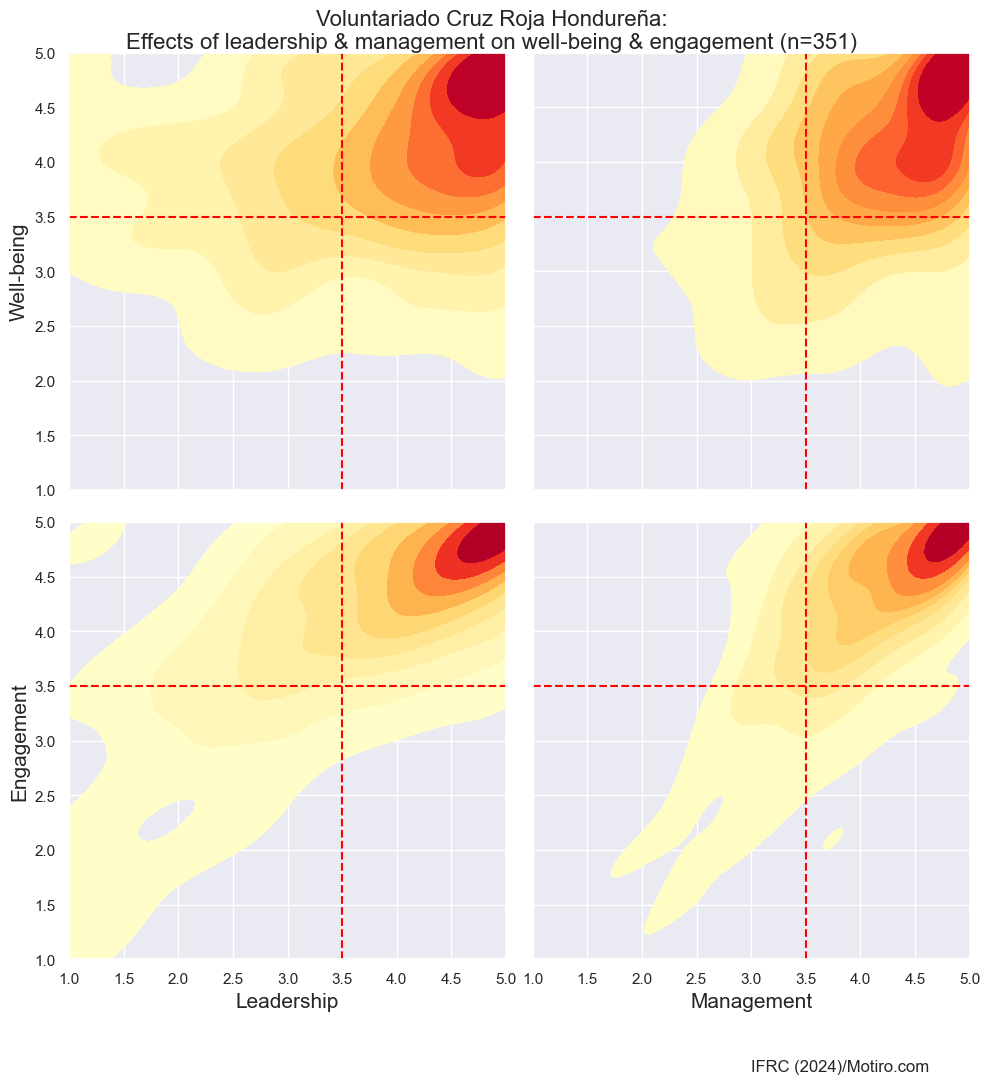

In [49]:
# Combined heatmaps HONDURAN RED CROSS
# Get the DataFrame for the team from Honduras
df = pd.read_csv(f'{Team}.csv', sep=",", encoding='utf-8')

# Count the total number of respondents (n)
n = df['Volunteer'].sum()

fig, axs = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

# Plot density heatmaps using sns.kdeplot
ax = sns.kdeplot(y=df['Well-being'], x=df['Leadership'], cmap='YlOrRd', fill=True, ax=axs[0, 0])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(15)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Well-being'], x=df['Management'], cmap='YlOrRd', fill=True, ax=axs[0, 1])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.xaxis.label.set_size(15)
ax = sns.kdeplot(y=df['Engagement'], x=df['Leadership'], cmap='YlOrRd', fill=True, ax=axs[1, 0])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.yaxis.label.set_size(15)
ax.xaxis.label.set_size(15)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Engagement'], x=df['Management'], cmap='YlOrRd', fill=True, ax=axs[1, 1])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.xaxis.label.set_size(15)

# Adjust the spacing between subplots
plt.tight_layout()

plt.suptitle(f'{Team}:\nEffects of leadership & management on well-being & engagement (n={n})',
             y=1.02, x=0.5, size=16)

plt.text(3, -0.02, "IFRC (2024)/Motiro.com", fontdict={'size': 12})

plt.savefig(f'{Team},Eng - Lead,Mgt.png', bbox_inches='tight', pad_inches=0)

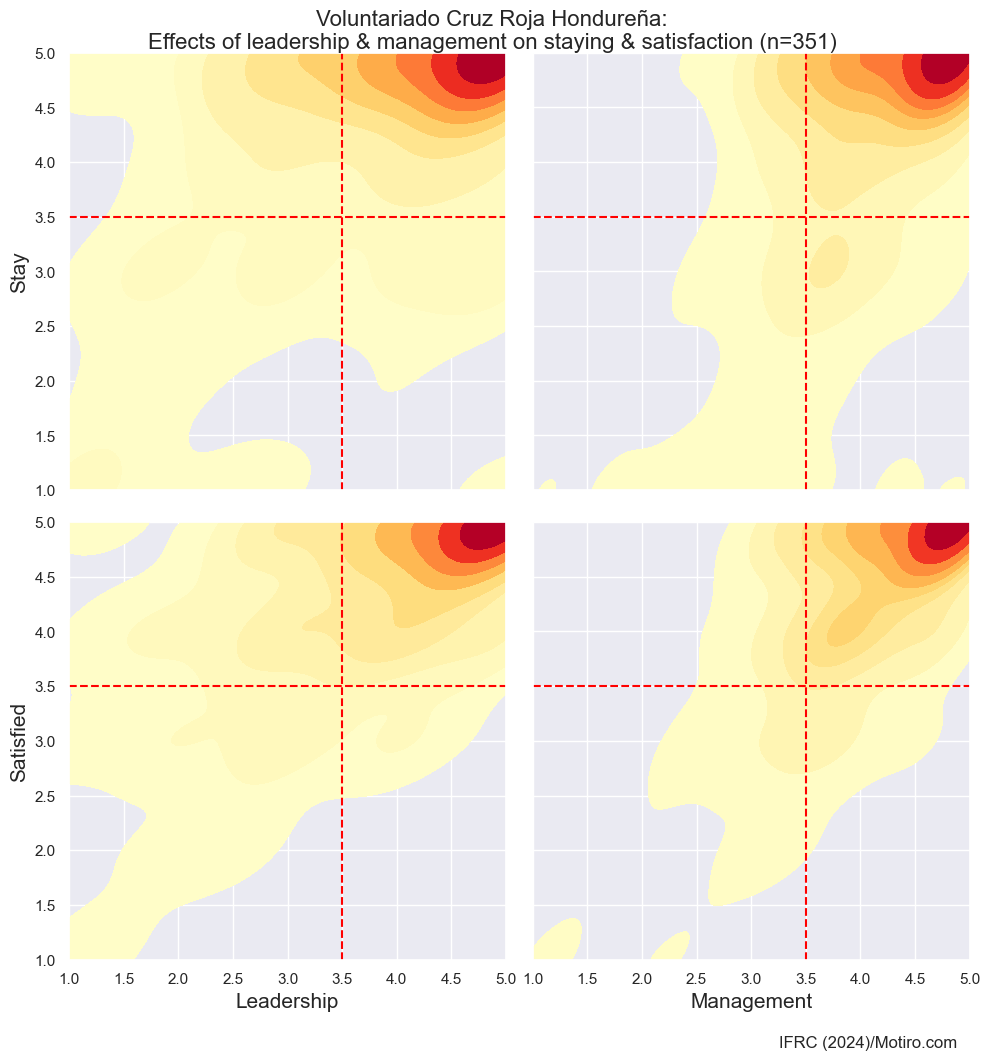

In [46]:
# Combined heatmaps UKRAINE RED CROSS
df = pd.read_csv(f'{Team}.csv', sep=",", encoding='utf-8')

# Count the total number of respondents (n)
n = df['Volunteer'].sum()

fig, axs = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

# Plot density heatmaps using sns.kdeplot
ax = sns.kdeplot(y=df['Stay'], x=df['Leadership'], cmap='YlOrRd', fill=True, ax=axs[0, 0])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(15)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Stay'], x=df['Management'], cmap='YlOrRd', fill=True, ax=axs[0, 1])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.xaxis.label.set_size(15)
ax = sns.kdeplot(y=df['Satisfied'], x=df['Leadership'], cmap='YlOrRd', fill=True, ax=axs[1, 0])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.yaxis.label.set_size(15)
ax.xaxis.label.set_size(15)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Satisfied'], x=df['Management'], cmap='YlOrRd', fill=True, ax=axs[1, 1])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.xaxis.label.set_size(15)

# Adjust the spacing between subplots
plt.tight_layout()

plt.suptitle(f'{Team}:\nEffects of leadership & management on staying & satisfaction (n={n})',
             y=1.02, x=0.5, size=16)

plt.text(3.25, 0.2, "IFRC (2024)/Motiro.com", fontdict={'size': 12})

plt.savefig(f'{Team}_stay heatmaps.png', bbox_inches='tight', pad_inches=0)

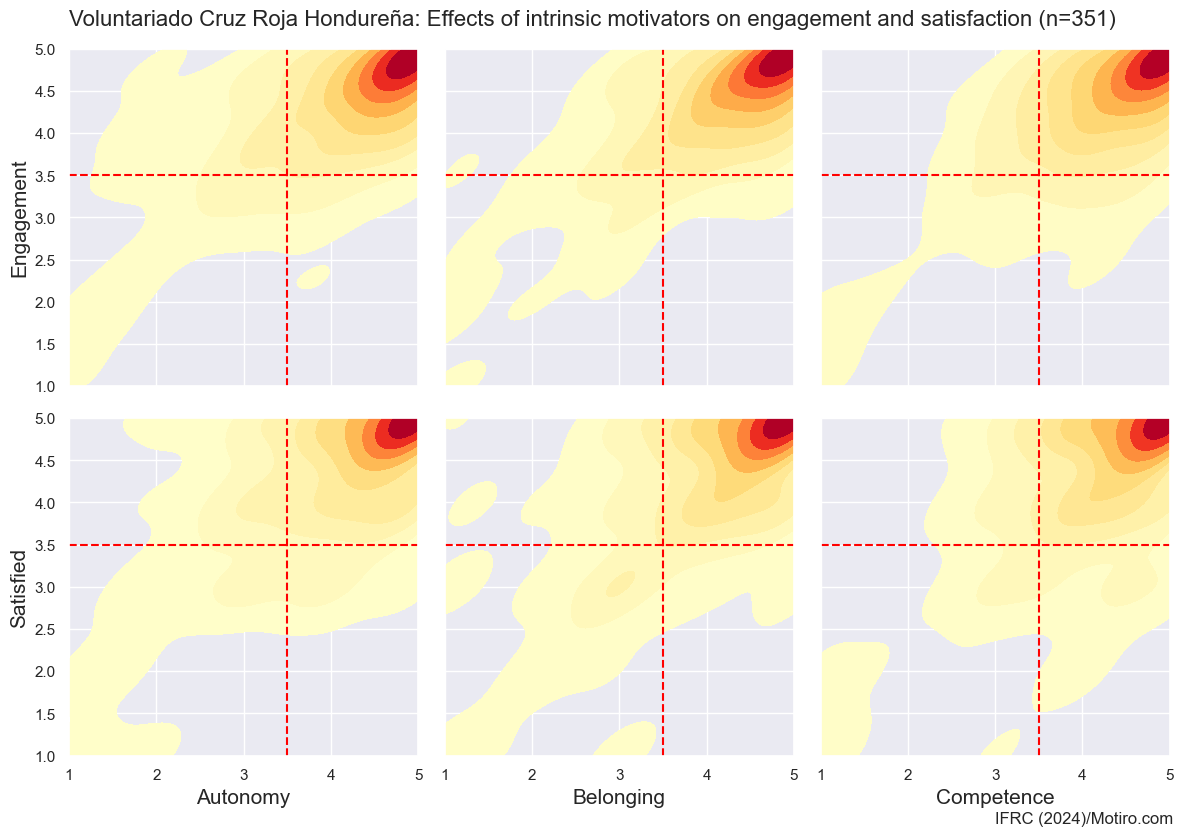

In [48]:
# SLIDE Combined heatmaps UKRAINE RED CROSS values, engagement, well-being and 3 needs
df = pd.read_csv(f'{Team}.csv', sep=",", encoding='utf-8')

# Count the total number of respondents (n)
n = df['Volunteer'].sum()

fig, axs = plt.subplots(2, 3, figsize=(12, 8), sharex=True, sharey=True)

# Plot density heatmaps using sns.kdeplot
ax = sns.kdeplot(y=df['Engagement'], x=df['Autonomy'], cmap='YlOrRd', fill=True, ax=axs[0, 0])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(15)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Engagement'], x=df['Belonging'], cmap='YlOrRd', fill=True, ax=axs[0, 1])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.xaxis.label.set_size(15)
ax = sns.kdeplot(y=df['Engagement'], x=df['Competence'], cmap='YlOrRd', fill=True, ax=axs[0, 2])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.xaxis.label.set_size(15)
ax = sns.kdeplot(y=df['Satisfied'], x=df['Autonomy'], cmap='YlOrRd', fill=True, ax=axs[1, 0])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.yaxis.label.set_size(15)
ax.xaxis.label.set_size(15)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Satisfied'], x=df['Belonging'], cmap='YlOrRd', fill=True, ax=axs[1, 1])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.xaxis.label.set_size(15)
ax = sns.kdeplot(y=df['Satisfied'], x=df['Competence'], cmap='YlOrRd', fill=True, ax=axs[1, 2])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.xaxis.label.set_size(15)
# Adjust the spacing between subplots
plt.tight_layout()

plt.suptitle(f'{Team}: Effects of intrinsic motivators on engagement and satisfaction (n={n})',
             y=1.02, x=0.5, size=16)

plt.text(3, 0.2, "IFRC (2024)/Motiro.com", fontdict={'size': 12})

plt.savefig(f'{Team}_needs heatmaps Slide.png', bbox_inches='tight', pad_inches=0)

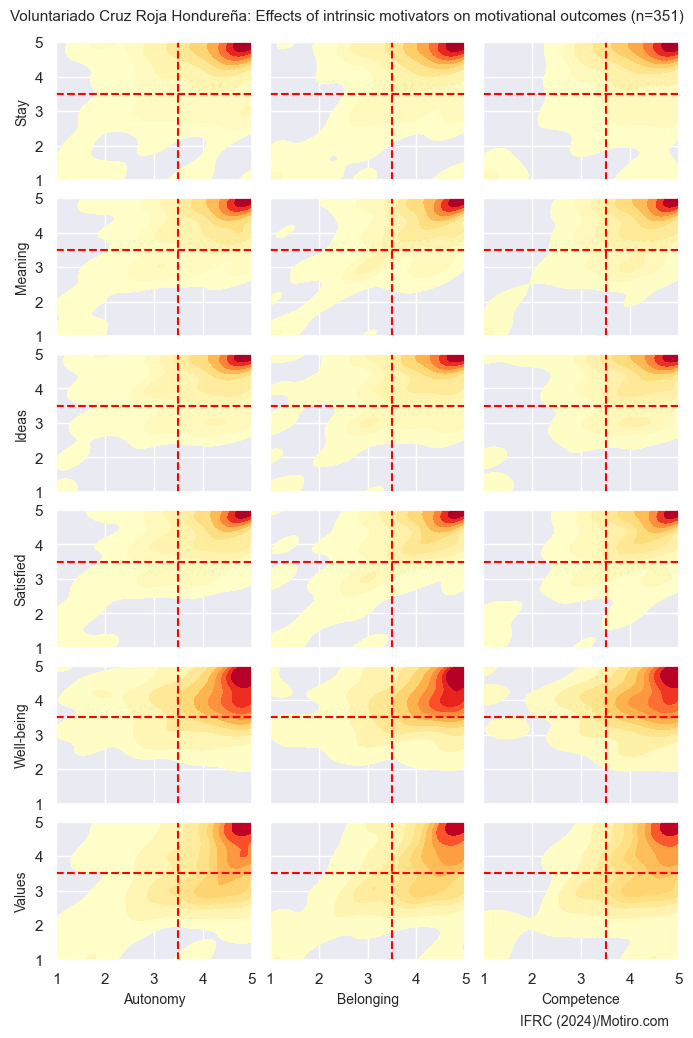

In [51]:

# Combined heatmaps UKRAINE RED CROSS 6 outcomes and 3 needs
df = pd.read_csv(f'{Team}.csv', sep=",", encoding='utf-8')

# Count the total number of respondents (n)
n = df['Volunteer'].sum()

fig, axs = plt.subplots(6, 3, figsize=(7, 10), sharex=True, sharey=True)

# Plot density heatmaps using sns.kdeplot
ax = sns.kdeplot(y=df['Stay'], x=df['Autonomy'], cmap='YlOrRd', fill=True, ax=axs[0, 0])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(10)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Stay'], x=df['Belonging'], cmap='YlOrRd', fill=True, ax=axs[0, 1])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.xaxis.label.set_size(10)
ax = sns.kdeplot(y=df['Stay'], x=df['Competence'], cmap='YlOrRd', fill=True, ax=axs[0, 2])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.xaxis.label.set_size(10)
ax = sns.kdeplot(y=df['Meaning'], x=df['Autonomy'], cmap='YlOrRd', fill=True, ax=axs[1, 0])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(10)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Meaning'], x=df['Belonging'], cmap='YlOrRd', fill=True, ax=axs[1, 1])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.xaxis.label.set_size(10)
ax = sns.kdeplot(y=df['Meaning'], x=df['Competence'], cmap='YlOrRd', fill=True, ax=axs[1, 2])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.xaxis.label.set_size(10)
ax = sns.kdeplot(y=df['Ideas'], x=df['Autonomy'], cmap='YlOrRd', fill=True, ax=axs[2, 0])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(10)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Ideas'], x=df['Belonging'], cmap='YlOrRd', fill=True, ax=axs[2, 1])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.xaxis.label.set_size(10)
ax = sns.kdeplot(y=df['Ideas'], x=df['Competence'], cmap='YlOrRd', fill=True, ax=axs[2, 2])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.xaxis.label.set_size(10)
ax = sns.kdeplot(y=df['Satisfied'], x=df['Autonomy'], cmap='YlOrRd', fill=True, ax=axs[3, 0])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(10)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Satisfied'], x=df['Belonging'], cmap='YlOrRd', fill=True, ax=axs[3, 1])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.xaxis.label.set_size(10)
ax = sns.kdeplot(y=df['Satisfied'], x=df['Competence'], cmap='YlOrRd', fill=True, ax=axs[3, 2])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.xaxis.label.set_size(10)
ax = sns.kdeplot(y=df['Well-being'], x=df['Autonomy'], cmap='YlOrRd', fill=True, ax=axs[4, 0])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(10)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Well-being'], x=df['Belonging'], cmap='YlOrRd', fill=True, ax=axs[4, 1])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.xaxis.label.set_size(10)
ax = sns.kdeplot(y=df['Well-being'], x=df['Competence'], cmap='YlOrRd', fill=True, ax=axs[4, 2])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.xaxis.label.set_size(10)
ax = sns.kdeplot(y=df['Values'], x=df['Autonomy'], cmap='YlOrRd', fill=True, ax=axs[5, 0])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.yaxis.label.set_size(10)
ax.xaxis.label.set_size(10)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Values'], x=df['Belonging'], cmap='YlOrRd', fill=True, ax=axs[5, 1])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.xaxis.label.set_size(10)
ax = sns.kdeplot(y=df['Values'], x=df['Competence'], cmap='YlOrRd', fill=True, ax=axs[5, 2])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.xaxis.label.set_size(10)
# Adjust the spacing between subplots
plt.tight_layout()

plt.suptitle(f'{Team}: Effects of intrinsic motivators on motivational outcomes (n={n})',
             y=1.015, x=0.5, size=11)

plt.text(1.75, -0.9, "IFRC (2024)/Motiro.com", fontdict={'size': 10})

plt.savefig(f'{Team}_outcome-3needs heatmaps.png', bbox_inches='tight', pad_inches=0)

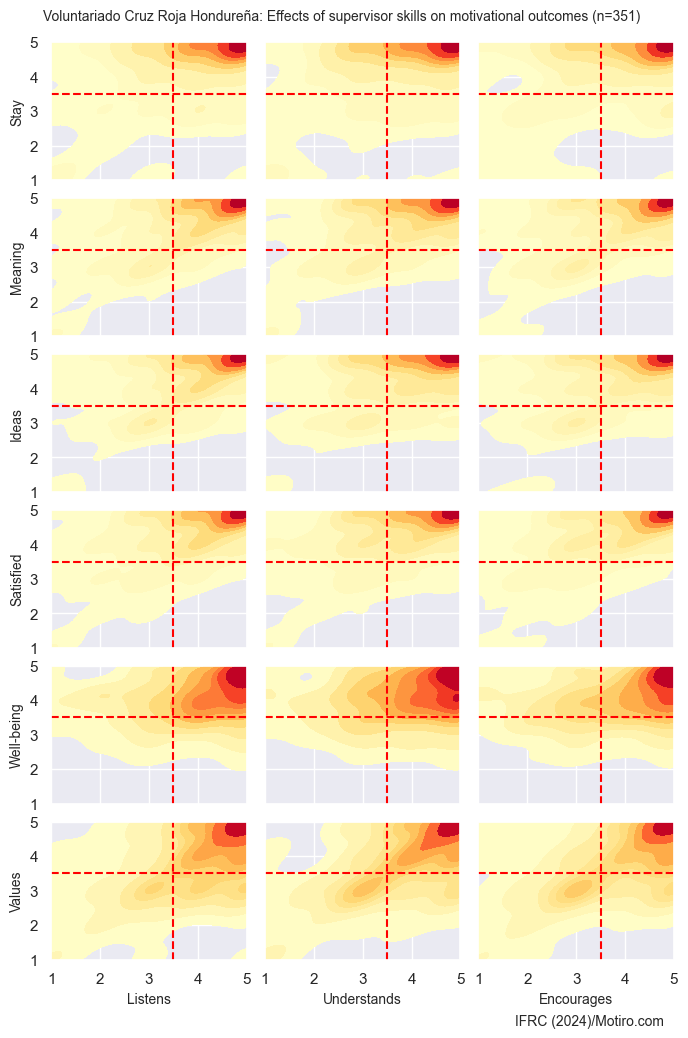

In [53]:

# Combined heatmaps UKRAINE RED CROSS 6 outcomes and 3 leadership skills
df = pd.read_csv(f'{Team}.csv', sep=",", encoding='utf-8')

# Count the total number of respondents (n)
n = df['Volunteer'].sum()

fig, axs = plt.subplots(6, 3, figsize=(7, 10), sharex=True, sharey=True)

# Plot density heatmaps using sns.kdeplot
ax = sns.kdeplot(y=df['Stay'], x=df['Listens'], cmap='YlOrRd', fill=True, ax=axs[0, 0])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(10)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Stay'], x=df['Understands'], cmap='YlOrRd', fill=True, ax=axs[0, 1])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.xaxis.label.set_size(10)
ax = sns.kdeplot(y=df['Stay'], x=df['Encourages'], cmap='YlOrRd', fill=True, ax=axs[0, 2])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.xaxis.label.set_size(10)
ax = sns.kdeplot(y=df['Meaning'], x=df['Listens'], cmap='YlOrRd', fill=True, ax=axs[1, 0])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(10)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Meaning'], x=df['Understands'], cmap='YlOrRd', fill=True, ax=axs[1, 1])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.xaxis.label.set_size(10)
ax = sns.kdeplot(y=df['Meaning'], x=df['Encourages'], cmap='YlOrRd', fill=True, ax=axs[1, 2])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.xaxis.label.set_size(10)
ax = sns.kdeplot(y=df['Ideas'], x=df['Listens'], cmap='YlOrRd', fill=True, ax=axs[2, 0])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(10)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Ideas'], x=df['Understands'], cmap='YlOrRd', fill=True, ax=axs[2, 1])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.xaxis.label.set_size(10)
ax = sns.kdeplot(y=df['Ideas'], x=df['Encourages'], cmap='YlOrRd', fill=True, ax=axs[2, 2])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.xaxis.label.set_size(10)
ax = sns.kdeplot(y=df['Satisfied'], x=df['Listens'], cmap='YlOrRd', fill=True, ax=axs[3, 0])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(10)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Satisfied'], x=df['Understands'], cmap='YlOrRd', fill=True, ax=axs[3, 1])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.xaxis.label.set_size(10)
ax = sns.kdeplot(y=df['Satisfied'], x=df['Encourages'], cmap='YlOrRd', fill=True, ax=axs[3, 2])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.xaxis.label.set_size(10)
ax = sns.kdeplot(y=df['Well-being'], x=df['Listens'], cmap='YlOrRd', fill=True, ax=axs[4, 0])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(10)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Well-being'], x=df['Understands'], cmap='YlOrRd', fill=True, ax=axs[4, 1])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.xaxis.label.set_size(10)
ax = sns.kdeplot(y=df['Well-being'], x=df['Encourages'], cmap='YlOrRd', fill=True, ax=axs[4, 2])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.xaxis.label.set_size(10)
ax = sns.kdeplot(y=df['Values'], x=df['Listens'], cmap='YlOrRd', fill=True, ax=axs[5, 0])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.yaxis.label.set_size(10)
ax.xaxis.label.set_size(10)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Values'], x=df['Understands'], cmap='YlOrRd', fill=True, ax=axs[5, 1])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.xaxis.label.set_size(10)
ax = sns.kdeplot(y=df['Values'], x=df['Encourages'], cmap='YlOrRd', fill=True, ax=axs[5, 2])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.xaxis.label.set_size(10)
# Adjust the spacing between subplots
plt.tight_layout()

plt.suptitle(f'{Team}: Effects of supervisor skills on motivational outcomes (n={n})',
             y=1.015, x=0.5, size=10)

plt.text(1.75, -0.9, "IFRC (2024)/Motiro.com", fontdict={'size': 10})

plt.savefig(f'{Team} -outcome-leadership heatmaps.png', bbox_inches='tight', pad_inches=0)

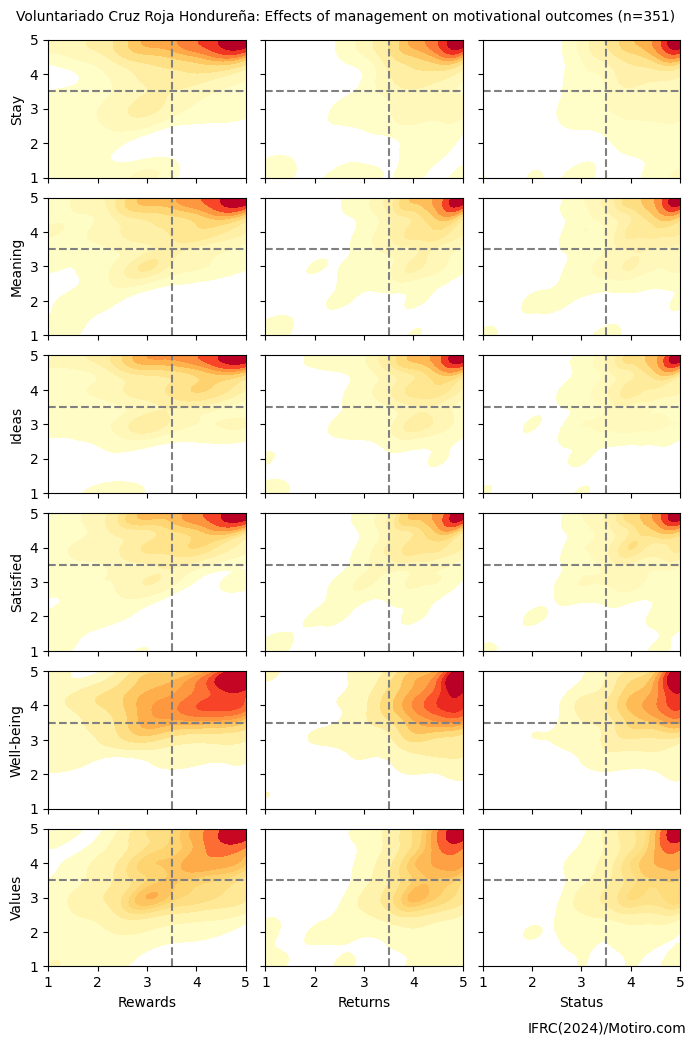

In [32]:
# Combined heatmaps UKRAINE RED CROSS 6 outcomes and 3 Management incentives
df = pd.read_csv(f'{Team}.csv', sep=",", encoding='utf-8')

# Count the total number of respondents (n)
n = df['Volunteer'].sum()

fig, axs = plt.subplots(6, 3, figsize=(7, 10), sharex=True, sharey=True)

# Plot density heatmaps using sns.kdeplot
ax = sns.kdeplot(y=df['Stay'], x=df['Rewards'], cmap='YlOrRd', fill=True, ax=axs[0, 0])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(10)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Stay'], x=df['Returns'], cmap='YlOrRd', fill=True, ax=axs[0, 1])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.xaxis.label.set_size(10)
ax = sns.kdeplot(y=df['Stay'], x=df['Status'], cmap='YlOrRd', fill=True, ax=axs[0, 2])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.xaxis.label.set_size(10)
ax = sns.kdeplot(y=df['Meaning'], x=df['Rewards'], cmap='YlOrRd', fill=True, ax=axs[1, 0])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(10)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Meaning'], x=df['Returns'], cmap='YlOrRd', fill=True, ax=axs[1, 1])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.xaxis.label.set_size(10)
ax = sns.kdeplot(y=df['Meaning'], x=df['Status'], cmap='YlOrRd', fill=True, ax=axs[1, 2])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.xaxis.label.set_size(10)
ax = sns.kdeplot(y=df['Ideas'], x=df['Rewards'], cmap='YlOrRd', fill=True, ax=axs[2, 0])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(10)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Ideas'], x=df['Returns'], cmap='YlOrRd', fill=True, ax=axs[2, 1])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.xaxis.label.set_size(10)
ax = sns.kdeplot(y=df['Ideas'], x=df['Status'], cmap='YlOrRd', fill=True, ax=axs[2, 2])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.xaxis.label.set_size(10)
ax = sns.kdeplot(y=df['Satisfied'], x=df['Rewards'], cmap='YlOrRd', fill=True, ax=axs[3, 0])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(10)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Satisfied'], x=df['Returns'], cmap='YlOrRd', fill=True, ax=axs[3, 1])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.xaxis.label.set_size(10)
ax = sns.kdeplot(y=df['Satisfied'], x=df['Status'], cmap='YlOrRd', fill=True, ax=axs[3, 2])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.xaxis.label.set_size(10)
ax = sns.kdeplot(y=df['Well-being'], x=df['Rewards'], cmap='YlOrRd', fill=True, ax=axs[4, 0])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.set_xlim(1, 5)
ax.set_ylim(1, 5)
ax.yaxis.label.set_size(10)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Well-being'], x=df['Returns'], cmap='YlOrRd', fill=True, ax=axs[4, 1])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.xaxis.label.set_size(10)
ax = sns.kdeplot(y=df['Well-being'], x=df['Status'], cmap='YlOrRd', fill=True, ax=axs[4, 2])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.xaxis.label.set_size(10)
ax = sns.kdeplot(y=df['Values'], x=df['Rewards'], cmap='YlOrRd', fill=True, ax=axs[5, 0])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.yaxis.label.set_size(10)
ax.xaxis.label.set_size(10)
ylabels = ['{:,.0f}']
ax = sns.kdeplot(y=df['Values'], x=df['Returns'], cmap='YlOrRd', fill=True, ax=axs[5, 1])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.xaxis.label.set_size(10)
ax = sns.kdeplot(y=df['Values'], x=df['Status'], cmap='YlOrRd', fill=True, ax=axs[5, 2])
ax.axvline(x=3.5, color='red', linestyle='--')
ax.axhline(y=3.5, color='red', linestyle='--')
ax.xaxis.label.set_size(10)
# Adjust the spacing between subplots
plt.tight_layout()

plt.suptitle(f'{Team}: Effects of management on motivational outcomes (n={n})',
             y=1.015, x=0.5, size=10)

plt.text(1.9, -0.9, "IFRC(2024)/Motiro.com", fontdict={'size': 10})

plt.savefig(f'{Team}_outcome-Management heatmaps.png', bbox_inches='tight', pad_inches=0)

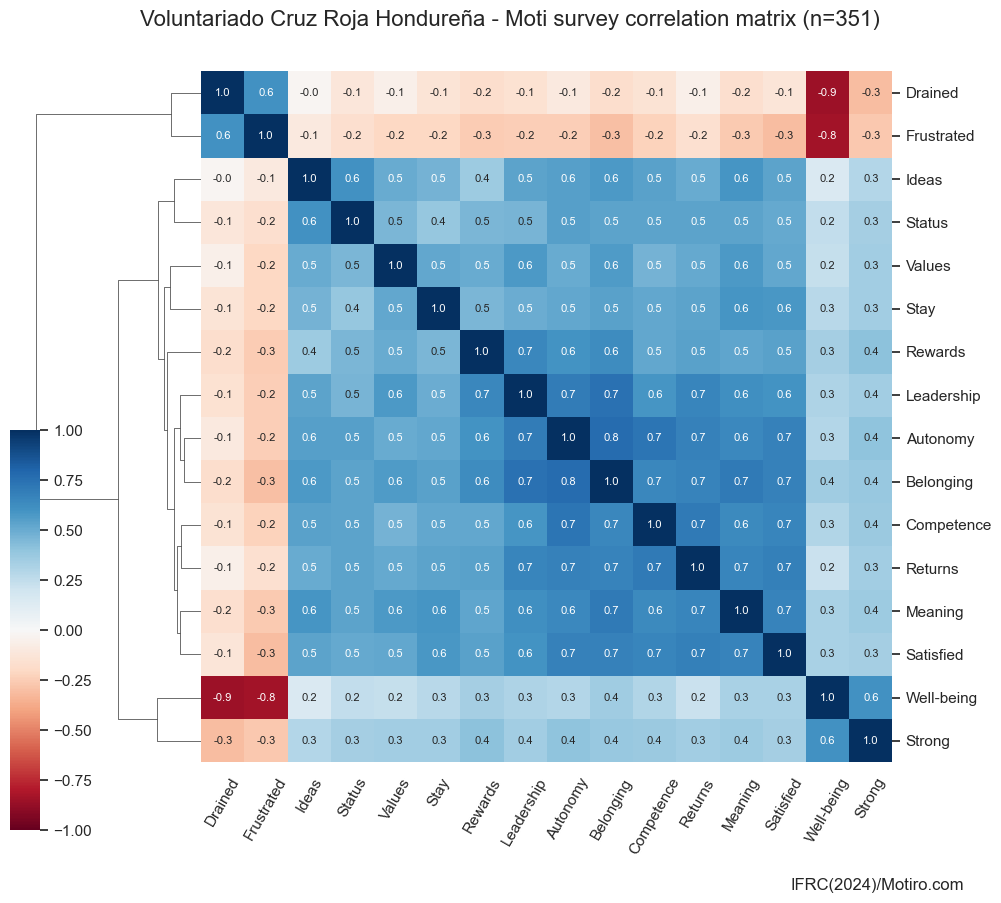

In [52]:
# Summary correlation matrix with grouped scores Ukraine Red Cross

df = pd.read_csv(f'{Team}.csv', sep=",", encoding='utf-8')

# Count the total number of respondents (n)
n = df['Volunteer'].sum()

columns = ['Well-being',
           'Ideas',
           'Meaning',
           'Values',
           'Autonomy',
           'Belonging',
           'Competence',
           'Leadership',
           'Returns',
           'Rewards',
           'Status',
           'Satisfied',
           'Stay',
           'Strong',
           'Drained',
           'Frustrated']

# Create the table with the desired columns
df = df[columns]

g = sns.clustermap(df.corr(), 
                   method = 'complete', 
                   #row_cluster=False,
                   cmap   = 'RdBu', vmin=-1, vmax=1,
                   cbar_pos=(0, .05, .03, .4),
                   annot  = True , fmt=".1f",
                   annot_kws = {'size': 8})
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=60);

g.ax_col_dendrogram.remove()

plt.suptitle(f'{Team} - Moti survey correlation matrix (n={n})',
             x=0.5, y=0.87, fontsize=16)
plt.text(26, -1.3, "IFRC(2024)/Motiro.com")

# Show the plot
plt.savefig(f'{Team} Summary Correlation Matrix.png', bbox_inches='tight', pad_inches=0)
plt.show()


Well-being Needs 0.1244144024210434 0.3527242583393484
Well-being Autonomy 0.08792831159119197 0.2965270840769726
Well-being Belonging 0.12686743117940946 0.35618454651965104
Well-being Competence 0.0905173694823691 0.30086104680129183
Well-being Leadership 0.09446034412086546 0.30734401591842564
Well-being Understands 0.05984140792890602 0.2446250353682264
Well-being Encourages 0.09787080043709984 0.31284309235957225
Well-being Listens 0.09175636522058228 0.3029131314759766
Well-being Management 0.11687573353178038 0.3418709311008767
Well-being Returns 0.04969751076666096 0.22292938515741023
Well-being Rewards 0.11661222438050067 0.3414853208858335
Well-being Status 0.062120299065320905 0.24923944123136071
Satisfied Needs 0.5457139111859248 0.7387245164375722
Satisfied Autonomy 0.45576269598125774 0.6751019893181013
Satisfied Belonging 0.45568817891673563 0.67504679757535
Satisfied Competence 0.43136165037656826 0.6567812804705752
Satisfied Leadership 0.35524982023927865 0.59602837200

C:\Users\gabriel.pictet\AppData\Local\Temp\ipykernel_19780\78912029.py:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_row], ignore_index=True)


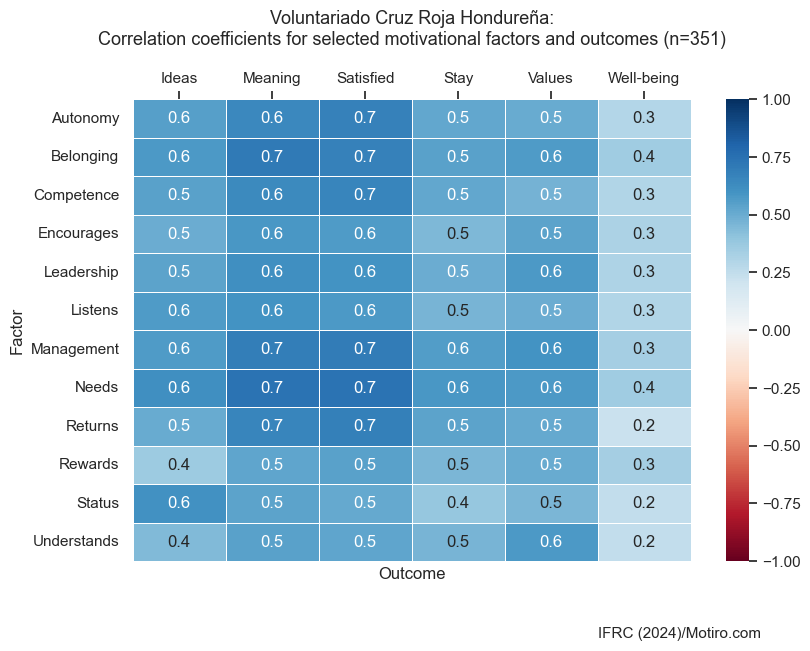

In [39]:
#  COUNTRY PROFILE: UKRAINE
#  CORRELATION COEFFICIENTS for staying, being staisfied, being frustrated  and being drained
#  and selected independent variables: Needs, Management, leadership
#  using Linear regression
#  use this to prepare odds ratio pivot table for VOL and STAFF and heatmap

# %pip install scikit-learn
#%pip install openpyxl

from scipy.stats import fisher_exact
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

df = pd.read_csv(f'{Team}.csv')

# Count the total number of respondents (n)
n = df['Volunteer'].sum()

columnY = ['Well-being', 'Satisfied', 'Meaning', 'Values', 'Ideas', 'Stay'] 
columnX = ['Needs', 'Autonomy', 'Belonging', 'Competence',
           'Leadership', 'Understands', 'Encourages', 'Listens',
           'Management', 'Returns', 'Rewards', 'Status']

#create the dataframe that will store the outputs
results_df= pd.DataFrame(columns=['Outcome', 'Factor', 'CorrCoef'])

for Y in columnY:
    for X in columnX:
        X_data = df[X].values.reshape(-1, 1)
        Y_data = df[Y]
        model = LinearRegression().fit(X_data, Y_data)
        r_sq = model.score(X_data, Y_data)
        r = np.sqrt(r_sq)
        print(Y, X, r_sq, r)
        # Append results to the results_df DataFrame
        new_row = pd.DataFrame({'Outcome': [Y], 'Factor': [X], 'CorrCoef': [r]})
        results_df = pd.concat([results_df, new_row], ignore_index=True)


# Display the results DataFrame
#print(results_df)

# Save the results DataFrame to a CSV file
results_df.to_csv(f'{Team}_CorrCoef.csv', index=False)

# Pivot the results_df DataFrame
pivot_table = results_df.pivot(index='Factor', columns='Outcome', values='CorrCoef')

# Display the pivot_table
print(pivot_table)

# Save the Pivot table DataFrame to a CSV file
pivot_table.to_excel(f'{Team}_CorrCoef_PivotTable.xlsx', index=False)      

# heatmap to represent odds ratios for team (all are volunteers)
sns.set_theme()

df = pd.read_csv(f'{Team}_CorrCoef.csv')

# Pivot the results_df DataFrame
pivot_table = df.pivot(index='Factor', columns='Outcome', values='CorrCoef')

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(pivot_table, annot=True, fmt=".1f", vmin=-1, vmax=1, linewidths=.5, cmap='RdBu', ax=ax)
ax.xaxis.tick_top()
#ax.set_xlabel('Outcome', x=0.5)

plt.text(5, 14, "IFRC (2024)/Motiro.com", fontdict={'size': 11})
plt.title(f'{Team}:\nCorrelation coefficients for selected motivational factors and outcomes (n={n})', 
          x=0.5, y=1.1, fontsize=13)

# Save the plot as an image file
plt.savefig(f'{Team}_r_heatmap.png', bbox_inches='tight', pad_inches=0)

Well-being Needs 0.23304502541779237 0.48274737225363784
Well-being Autonomy 0.2246317116650408 0.4739532800446061
Well-being Belonging 0.1769891863041494 0.4207008275534402
Well-being Competence 0.0787870673755956 0.2806903407237157
Well-being Leadership 0.1582759552813734 0.39783910728003274
Well-being Understands 0.15777122970883473 0.3972042669821596
Well-being Encourages 0.09098792163772074 0.3016420422250863
Well-being Listens 0.1303147842047392 0.36099139076263187
Well-being Management 0.2063598375112251 0.4542684641390211
Well-being Returns 0.09242244439808434 0.3040105991541814
Well-being Rewards 0.14140071257772358 0.3760328610344096
Well-being Status 0.17028667973190703 0.41265806635991864
Satisfied Needs 0.4635648260623646 0.6808559510369022
Satisfied Autonomy 0.37444723111089584 0.6119209353428724
Satisfied Belonging 0.3604082971524716 0.6003401512080228
Satisfied Competence 0.21869124813070517 0.46764436073869764
Satisfied Leadership 0.2893883957739374 0.5379483207278719


C:\Users\gabriel.pictet\AppData\Local\Temp\ipykernel_15428\2565180112.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_row], ignore_index=True)


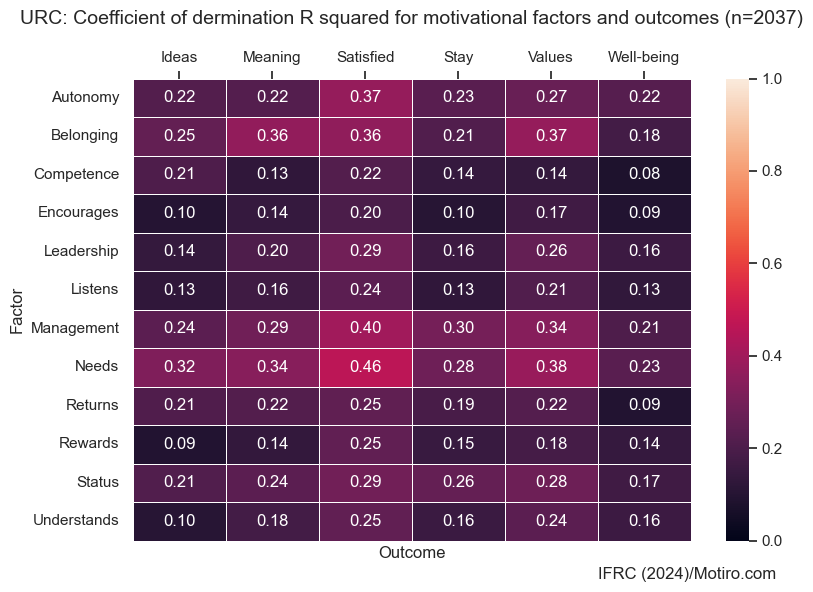

In [40]:
#  COUNTRY PROFILE: UKRAINE
#  CORRELATION DETERMINANTS R for staying, being satisfied, being frustrated  and being drained
#  and selected independent variables: Needs, Management, leadership
#  using Linear regression
#  use this to prepare odds ratio pivot table for VOL and STAFF and heatmap

from scipy.stats import fisher_exact
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

df = pd.read_csv('URC_ALL.csv')

columnY = ['Well-being', 'Satisfied', 'Meaning', 'Values', 'Ideas', 'Stay'] 
columnX = ['Needs', 'Autonomy', 'Belonging', 'Competence',
           'Leadership', 'Understands', 'Encourages', 'Listens',
           'Management', 'Returns', 'Rewards', 'Status']

#create the dataframe that will store the outputs
results_df= pd.DataFrame(columns=['Outcome', 'Factor', 'CorrDet'])

for Y in columnY:
    for X in columnX:
        X_data = df[X].values.reshape(-1, 1)
        Y_data = df[Y]
        model = LinearRegression().fit(X_data, Y_data)
        r_sq = model.score(X_data, Y_data)
        r = np.sqrt(r_sq)
        print(Y, X, r_sq, r)
        
        # Append results to the results_df DataFrame
        new_row = pd.DataFrame({'Outcome': [Y], 'Factor': [X], 'CorrDet': [r_sq]})
        results_df = pd.concat([results_df, new_row], ignore_index=True)

# Save the results DataFrame to a CSV file
results_df.to_csv('CorrDet_Ukraine.csv', index=False)

# Pivot the results_df DataFrame
pivot_table = results_df.pivot(index='Factor', columns='Outcome', values='CorrDet')

# Display the pivot_table
print(pivot_table)

# Save the Pivot table DataFrame to a CSV file
pivot_table.to_excel('CorrDet_PivotTable_Ukraine.xlsx', index=False)      

# heatmap to represent correlation determinants for UKRAINE RED CROSS only (staff+volunteers)
sns.set_theme()

df = pd.read_csv('CorrDet_Ukraine.csv')

# Pivot the results_df DataFrame
pivot_table = df.pivot(index='Factor', columns='Outcome', values='CorrDet')

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", vmin=0, vmax=1, linewidths=.5, ax=ax)
ax.xaxis.tick_top()
#ax.set_xlabel('Outcome', x=0.5)

plt.text(5, 13, "IFRC (2024)/Motiro.com", fontdict={'size': 12})
plt.title(f'URC: Coefficient of dermination R squared for motivational factors and outcomes (n={n})',
          x=0.5, y=1.1, fontsize=14)

# Save the plot as an image file
plt.savefig('URC_R-sq_heatmap.png', bbox_inches='tight', pad_inches=0)

In [41]:
# create dummy variables for motivational outcomes (Y) and independent variables (x)
df = pd.read_csv("URC_ALL.csv", sep=",", encoding='utf-8')

# first we select 2 types of outcome variable - on 1-5 and 1-7 scales
# we create dictionary to recode the values in each category of outcome variables

columns5 = ['Satisfied',
            'Stay',
            'Values',
            'Meaning',
            'Ideas',
            ]

columns7 = ['Strong',
           'Drained',
           'Frustrated']

# we create dictionary to recode the values in each category of outcome variables
# neutral (3) is considered positive, i.e. Y=1 if neutral)
mapping5 = {
    5: 1,
    4: 1,
    3: 1,
    2: 0,
    1: 0
}

# NB: this is the current coding for frequencies:
#    "Every day": 7,
#    "Very often": 6,
#    "Often": 5,
#    "Sometimes": 4,
#    "Rarely": 3,
#    "Almost never": 2,
#    "Never": 1
# We set the cut off point between 4 (sometimes) and 5 (often), i.e. Y=1 if "often"
mapping7 = {
    7: 1,
    6: 1,
    5: 1,
    4: 0,
    3: 0,
    2: 0,
    1: 0
}

df[columns5] = df[columns5].replace(mapping5)
df[columns7] = df[columns7].replace(mapping7)

df.head(20)

#Independent Variables to convert into dummy variables for Odds Ratio computations
# we create dictionary to recode the values in each category of outcome variables
# cutoff point: 3.5 and above considered positive.
# We keep the original continous variables in the data.

df['Well'] = df['Well-being']
df['3Needsmet'] = df['Needs']
df['Autonomous'] = df['Autonomy']
df['Belongs'] = df['Belonging']
df['Competent'] = df['Competence']
df['LeaderOK'] = df['Leadership']
df['Understood'] = df['Understands']
df['Encouraged'] = df['Encourages']
df['Heard'] = df['Listens']
df['ManagementOK'] = df['Management']
df['ReturnsOK'] = df['Returns']
df['RewardsOK'] = df['Rewards']
df['StatusOK'] = df['Status']
   
DummyColumns = [
    'Well',
    '3Needsmet',
    'Autonomous',
    'Belongs',
    'Competent',
    'LeaderOK',
    'Understood',
    'Encouraged',
    'Heard',
    'ManagementOK',
    'ReturnsOK',
    'RewardsOK',
    'StatusOK'
    ] 

# Calculate the rounded value row by row and assign it to a new dummy variable column
# By rounding we can have 3.5 and above as 1  and below 3.5 as 0
df[DummyColumns] = df[DummyColumns].round(0)
df[DummyColumns] = df[DummyColumns].astype(int)
df
mappingX = {
    5: 1,
    4: 1,
    3: 0,
    2: 0,
    1: 0
}

df[DummyColumns] = df[DummyColumns].replace(mappingX)

#for Var_x in df[DummyColumn]:
#    Var_x = float(Var_x)
#    if Var_x < 4 :
#        Var_x = 0
#    else: Var_x = 1
    
#Variables to keep for logistic regressions
columns = ['Strong', 'Drained', 'Frustrated',
           'Satisfied', 'Stay', 'Values', 'Meaning', 'Ideas',
           'region', 'Staff', 'Volunteer',
           'Well-being', 'Needs', 'Autonomy', 'Belonging', 'Competence',
           'Leadership', 'Understands', 'Encourages', 'Listens',
           'Management', 'Returns', 'Rewards', 'Status',
           'Well', '3Needsmet', 'Autonomous', 'Belongs', 'Competent',
           'LeaderOK', 'Understood', 'Encouraged', 'Heard',
           'ManagementOK', 'ReturnsOK', 'RewardsOK', 'StatusOK', 'Front'
          ]

LogReg_df=df[columns]


LogReg_df.to_csv('LogReg_df_URC.csv', index=False)
df.head(7)


df.shape

(2602, 59)

Stay 3Needsmet [[31.32819253]]
Stay Autonomous [[18.78848606]]
Stay Belongs [[8.01887889]]
Stay Competent [[14.11903664]]
Stay LeaderOK [[10.8375858]]
Stay Understood [[8.12429124]]
Stay Encouraged [[5.78596026]]
Stay Heard [[10.63080478]]
Stay ManagementOK [[26.24866398]]
Stay ReturnsOK [[20.13714325]]
Stay RewardsOK [[12.30649846]]
Stay StatusOK [[24.25115828]]
Stay Volunteer [[8.46649645]]
Stay Front [[2.3087032]]
Satisfied 3Needsmet [[57.56282372]]
Satisfied Autonomous [[79.21926263]]
Satisfied Belongs [[17.21186662]]
Satisfied Competent [[12.57711374]]
Satisfied LeaderOK [[25.65584964]]
Satisfied Understood [[14.63642923]]
Satisfied Encouraged [[21.17721794]]
Satisfied Heard [[13.80144179]]
Satisfied ManagementOK [[31.3260993]]
Satisfied ReturnsOK [[18.73842936]]
Satisfied RewardsOK [[32.50082136]]
Satisfied StatusOK [[33.61133977]]
Satisfied Volunteer [[9.3453723]]
Satisfied Front [[0.29693764]]
Meaning 3Needsmet [[57.38635498]]
Meaning Autonomous [[26.36259297]]
Meaning Belongs 

C:\Users\gabriel.pictet\AppData\Local\Temp\ipykernel_15428\2369604442.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_row], ignore_index=True)


Meaning Understood [[33.88608412]]
Meaning Encouraged [[25.16920511]]
Meaning Heard [[13.33826944]]
Meaning ManagementOK [[27.08579828]]
Meaning ReturnsOK [[27.12586454]]
Meaning RewardsOK [[33.30044274]]
Meaning StatusOK [[11.70145003]]
Meaning Volunteer [[11.17197541]]
Meaning Front [[1.19510385]]
Values 3Needsmet [[47.63946451]]
Values Autonomous [[24.57689059]]
Values Belongs [[16.23682035]]
Values Competent [[17.89350773]]
Values LeaderOK [[26.54454338]]
Values Understood [[27.65404961]]
Values Encouraged [[9.97828869]]
Values Heard [[18.71248256]]
Values ManagementOK [[28.88983364]]
Values ReturnsOK [[25.37092244]]
Values RewardsOK [[11.70042136]]
Values StatusOK [[14.45345734]]
Values Volunteer [[8.62310094]]
Values Front [[1.2107523]]
Ideas 3Needsmet [[15.65490663]]
Ideas Autonomous [[7.21954634]]
Ideas Belongs [[11.8454755]]
Ideas Competent [[8.98867899]]
Ideas LeaderOK [[8.29541622]]
Ideas Understood [[8.45969197]]
Ideas Encouraged [[7.22151298]]
Ideas Heard [[9.68877167]]
Id

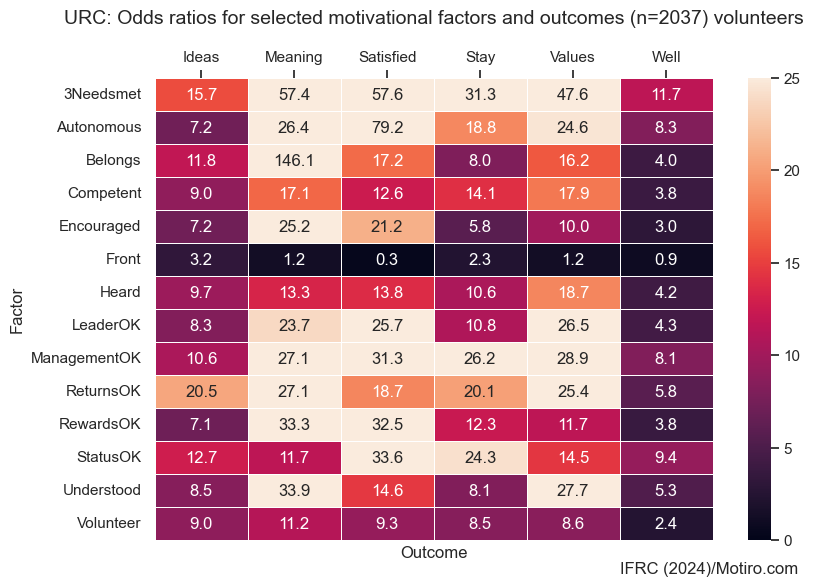

In [50]:
###### COUNTRY PROFILE: UKRAINE - VOLUNTEERS ONLY
#  Odds ratios for staying, being satisfied, being frustrated  and being drained
#  and selected independent variables: Needs, Management, leadership
#  using logistic regression
#  use this to prepare odds ratio pivot table for VOL and STAFF and heatmap

from scipy.stats import fisher_exact
import itertools
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('LogReg_df_URC.csv')

# Filter the dataframe for volunteers only
df = df[df['Volunteer'] == 1]
n=df['Volunteer'].sum()

columnY = ['Stay', 'Satisfied', 'Meaning', 'Values', 'Ideas', 'Well'] 
columnX = ['3Needsmet', 'Autonomous', 'Belongs', 'Competent',
           'LeaderOK', 'Understood', 'Encouraged', 'Heard',
           'ManagementOK', 'ReturnsOK', 'RewardsOK', 'StatusOK', 'Volunteer', 'Front']

#create the dataframe that will store the outputs
results_df= pd.DataFrame(columns=['Outcome', 'Factor', 'Odds ratio'])

for Y in columnY:
    for X in columnX:
        clf = LogisticRegression(penalty=None)
        # Reshape the data to be 2D
        X_data = df[X].values.reshape(-1, 1)
        Y_data = df[Y]
        clf.fit(X_data, Y_data)
        odds_ratio = np.exp(clf.coef_)
        print(Y, X, odds_ratio)
        # Append results to the results_df DataFrame using pd.concat
        new_row = pd.DataFrame({'Outcome': [Y], 'Factor': [X], 'Odds ratio': [odds_ratio[0][0]]})
        results_df = pd.concat([results_df, new_row], ignore_index=True)

# Display the results DataFrame
#print(results_df)

# Save the results DataFrame to a CSV file
results_df.to_csv('odds_ratios_Ukraine_VOL.csv', index=False)

# Pivot the results_df DataFrame
pivot_table = results_df.pivot(index='Factor', columns='Outcome', values='Odds ratio')

# Display the pivot_table
#print(pivot_table)

# Save the Pivot table DataFrame to a CSV file
pivot_table.to_excel('odds_ratios_PivotTable_Ukraine_VOL.xlsx', index=False)      

# heatmap to represent odds ratios for UKRAINE RED CROSS only (all are volunteers)
sns.set_theme()

df = pd.read_csv('odds_ratios_Ukraine_VOL.csv')

# Pivot the results_df DataFrame
pivot_table = df.pivot(index='Factor', columns='Outcome', values='Odds ratio')

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(pivot_table, annot=True, fmt=".1f", vmin=0, vmax=25, linewidths=.5, ax=ax)
ax.xaxis.tick_top()
#ax.set_xlabel('Outcome', x=0.5)

plt.text(5, 15, "IFRC (2024)/Motiro.com", fontdict={'size': 12})
plt.title(f'URC: Odds ratios for selected motivational factors and outcomes (n={n}) volunteers',
          x=0.5, y=1.1, fontsize=14)

# Save the plot as an image file
plt.savefig('URC_OR_heatmap_VOL.png', bbox_inches='tight', pad_inches=0)

Stay 3Needsmet [[12.02646571]]
Stay Autonomous [[7.02998612]]
Stay Belongs [[6.91383409]]
Stay Competent [[3.83996569]]
Stay LeaderOK [[10.5849114]]
Stay Understood [[12.94869583]]
Stay Encouraged [[7.45998505]]
Stay Heard [[4.63872822]]
Stay ManagementOK [[29.06912839]]
Stay ReturnsOK [[13.54301244]]
Stay RewardsOK [[439.69961619]]
Stay StatusOK [[41.09825356]]
Stay Volunteer [[1.]]
Stay Front [[2.33538487]]
Satisfied 3Needsmet [[1859.87860322]]
Satisfied Autonomous [[2700.21188552]]
Satisfied Belongs [[34.44518855]]
Satisfied Competent [[9.63892387]]
Satisfied LeaderOK [[1116.51383539]]
Satisfied Understood [[1368.78506389]]
Satisfied Encouraged [[7.45998505]]
Satisfied Heard [[9.42042065]]
Satisfied ManagementOK [[71.49254117]]
Satisfied ReturnsOK [[28.45090388]]
Satisfied RewardsOK [[14.43563977]]
Satisfied StatusOK [[41.09825356]]
Satisfied Volunteer [[1.]]
Satisfied Front [[0.47951184]]
Meaning 3Needsmet [[7.981115]]
Meaning Autonomous [[10.43789532]]
Meaning Belongs [[10.2646107

C:\Users\gabriel.pictet\AppData\Local\Temp\ipykernel_15428\2080654820.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_row], ignore_index=True)


Ideas Volunteer [[1.]]
Ideas Front [[0.92947825]]
Well 3Needsmet [[15.97180871]]
Well Autonomous [[11.97754263]]
Well Belongs [[7.34952002]]
Well Competent [[5.89044538]]
Well LeaderOK [[5.49674578]]
Well Understood [[6.68101603]]
Well Encouraged [[3.12757896]]
Well Heard [[3.81033279]]
Well ManagementOK [[6.20845707]]
Well ReturnsOK [[3.93897653]]
Well RewardsOK [[3.74811069]]
Well StatusOK [[10.15452131]]
Well Volunteer [[1.]]
Well Front [[2.12180821]]


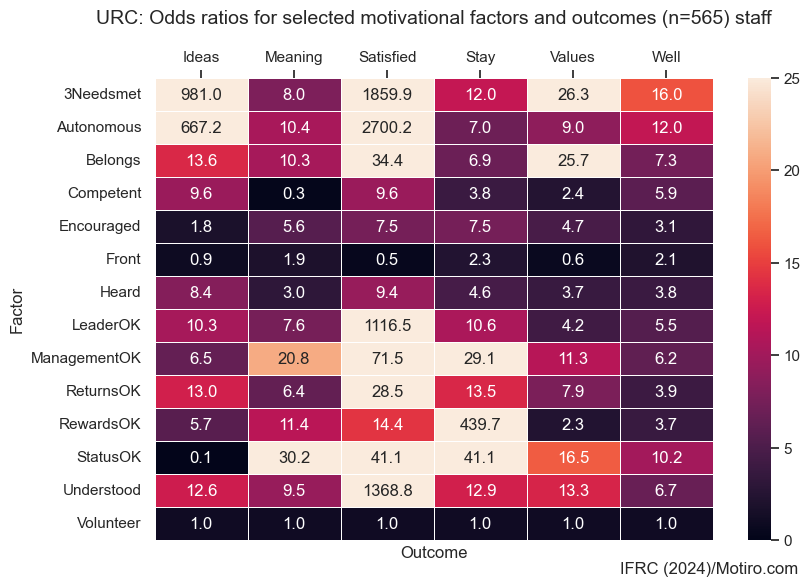

In [51]:
###### COUNTRY PROFILE: UKRAINE - STAFF ONLY
#  Odds ratios for staying, being satisfied, being frustrated  and being drained
#  and selected independent variables: Needs, Management, leadership
#  using logistic regression
#  use this to prepare odds ratio pivot table for VOL and STAFF and heatmap

from scipy.stats import fisher_exact
import itertools
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('LogReg_df_URC.csv')

# Filter the dataframe for staff only
df = df[df['Staff'] == 1]
n=df['Staff'].sum()

columnY = ['Stay', 'Satisfied', 'Meaning', 'Values', 'Ideas', 'Well'] 
columnX = ['3Needsmet', 'Autonomous', 'Belongs', 'Competent',
           'LeaderOK', 'Understood', 'Encouraged', 'Heard',
           'ManagementOK', 'ReturnsOK', 'RewardsOK', 'StatusOK', 'Volunteer', 'Front']

#create the dataframe that will store the outputs
results_df= pd.DataFrame(columns=['Outcome', 'Factor', 'Odds ratio'])

for Y in columnY:
    for X in columnX:
        clf = LogisticRegression(penalty=None)
        # Reshape the data to be 2D
        X_data = df[X].values.reshape(-1, 1)
        Y_data = df[Y]
        clf.fit(X_data, Y_data)
        odds_ratio = np.exp(clf.coef_)
        print(Y, X, odds_ratio)
        # Append results to the results_df DataFrame using pd.concat
        new_row = pd.DataFrame({'Outcome': [Y], 'Factor': [X], 'Odds ratio': [odds_ratio[0][0]]})
        results_df = pd.concat([results_df, new_row], ignore_index=True)

# Display the results DataFrame
#print(results_df)

# Save the results DataFrame to a CSV file
results_df.to_csv('odds_ratios_Ukraine_STAFF.csv', index=False)

# Pivot the results_df DataFrame
pivot_table = results_df.pivot(index='Factor', columns='Outcome', values='Odds ratio')

# Display the pivot_table
#print(pivot_table)

# Save the Pivot table DataFrame to a CSV file
pivot_table.to_excel('odds_ratios_PivotTable_Ukraine_STAFF.xlsx', index=False)      

# heatmap to represent odds ratios for UKRAINE RED CROSS only (all are volunteers)
sns.set_theme()

df = pd.read_csv('odds_ratios_Ukraine_STAFF.csv')

# Pivot the results_df DataFrame
pivot_table = df.pivot(index='Factor', columns='Outcome', values='Odds ratio')

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(pivot_table, annot=True, fmt=".1f", vmin=0, vmax=25, linewidths=.5, ax=ax)
ax.xaxis.tick_top()
#ax.set_xlabel('Outcome', x=0.5)

plt.text(5, 15, "IFRC (2024)/Motiro.com", fontdict={'size': 12})
plt.title(f'URC: Odds ratios for selected motivational factors and outcomes (n={n}) staff',
          x=0.5, y=1.1, fontsize=14)

# Save the plot as an image file
plt.savefig('URC_OR_heatmap_STAFF.png', bbox_inches='tight', pad_inches=0)

Stay 3Needsmet [[31.32819253]]
Stay Autonomous [[18.78848606]]
Stay Belongs [[8.01887889]]
Stay Competent [[14.11903664]]
Stay LeaderOK [[10.8375858]]
Stay Understood [[8.12429124]]
Stay Encouraged [[5.78596026]]
Stay Heard [[10.63080478]]
Stay ManagementOK [[26.24866398]]
Stay ReturnsOK [[20.13714325]]
Stay RewardsOK [[12.30649846]]
Stay StatusOK [[24.25115828]]
Stay Front [[2.3087032]]
Drained 3Needsmet [[0.1560908]]
Drained Autonomous [[0.23219389]]
Drained Belongs [[0.36978161]]
Drained Competent [[0.45536646]]
Drained LeaderOK [[0.33452474]]
Drained Understood [[0.29735164]]
Drained Encouraged [[0.47329655]]
Drained Heard [[0.39928547]]
Drained ManagementOK [[0.27939775]]
Drained ReturnsOK [[0.40590055]]
Drained RewardsOK [[0.41094036]]
Drained StatusOK [[0.29890164]]
Drained Front [[0.84130339]]
Frustrated 3Needsmet [[0.05158798]]
Frustrated Autonomous [[0.08365113]]


C:\Users\gabriel.pictet\AppData\Local\Temp\ipykernel_15428\3276127111.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_row], ignore_index=True)


Frustrated Belongs [[0.15056681]]
Frustrated Competent [[0.18758162]]
Frustrated LeaderOK [[0.15689746]]
Frustrated Understood [[0.11192075]]
Frustrated Encouraged [[0.26540476]]
Frustrated Heard [[0.15838668]]
Frustrated ManagementOK [[0.0978613]]
Frustrated ReturnsOK [[0.09952902]]
Frustrated RewardsOK [[0.16441151]]
Frustrated StatusOK [[0.08220862]]
Frustrated Front [[0.88594157]]
Strong 3Needsmet [[14.88932615]]
Strong Autonomous [[10.57342817]]
Strong Belongs [[4.7333785]]
Strong Competent [[6.98698351]]
Strong LeaderOK [[5.71802379]]
Strong Understood [[5.21997865]]
Strong Encouraged [[3.789898]]
Strong Heard [[5.55926146]]
Strong ManagementOK [[8.56385923]]
Strong ReturnsOK [[7.34049897]]
Strong RewardsOK [[3.63936365]]
Strong StatusOK [[16.725518]]
Strong Front [[0.74229927]]
Satisfied 3Needsmet [[57.56282372]]
Satisfied Autonomous [[79.21926263]]
Satisfied Belongs [[17.21186662]]
Satisfied Competent [[12.57711374]]
Satisfied LeaderOK [[25.65584964]]
Satisfied Understood [[14.

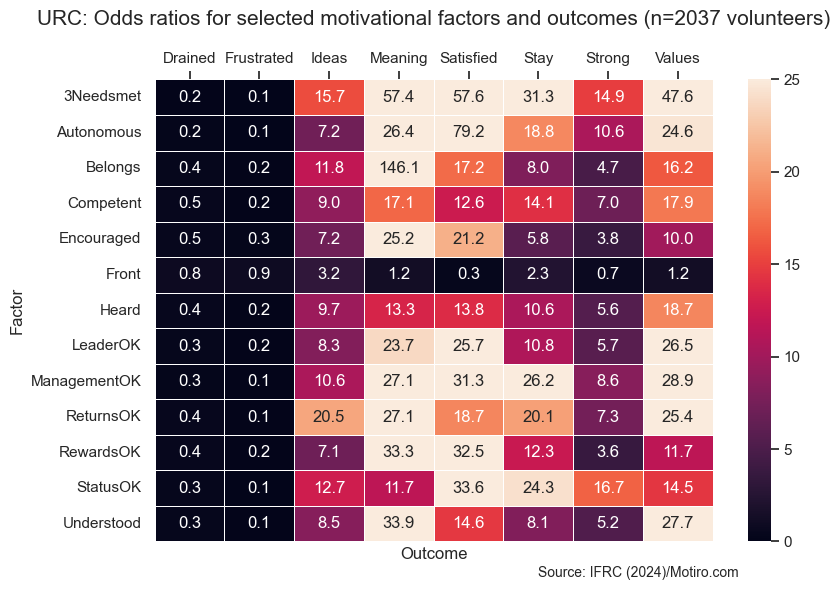

In [52]:
#  COUNTRY PROFILE: UKRAINE
#  Odds ratios for staying, being staisfied, being frustrated  and being drained
#  and selected independent variables: Needs, Management, leadership
#  using logistic regression
#  use this to prepare odds ratio pivot table for VOL and STAFF and heatmap

from scipy.stats import fisher_exact
import itertools
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('LogReg_df_URC.csv')

# Filter the dataframe for volunteers only
df = df[df['Volunteer'] == 1]
n=df['Volunteer'].sum()

columnY = ['Stay', 'Drained', 'Frustrated', 'Strong', 'Satisfied', 'Meaning', 'Values', 'Ideas'] 
columnX = ['3Needsmet', 'Autonomous', 'Belongs', 'Competent',
           'LeaderOK', 'Understood', 'Encouraged', 'Heard',
           'ManagementOK', 'ReturnsOK', 'RewardsOK', 'StatusOK', 'Front']

#create the dataframe that will store the outputs
results_df= pd.DataFrame(columns=['Outcome', 'Factor', 'Odds ratio'])

for Y in columnY:
    for X in columnX:
        clf = LogisticRegression(penalty=None)
        # Reshape the data to be 2D
        X_data = df[X].values.reshape(-1, 1)
        Y_data = df[Y]
        clf.fit(X_data, Y_data)
        odds_ratio = np.exp(clf.coef_)
        print(Y, X, odds_ratio)
        # Append results to the results_df DataFrame using pd.concat
        new_row = pd.DataFrame({'Outcome': [Y], 'Factor': [X], 'Odds ratio': [odds_ratio[0][0]]})
        results_df = pd.concat([results_df, new_row], ignore_index=True)

# Display the results DataFrame
#print(results_df)

# Save the results DataFrame to a CSV file
results_df.to_csv('odds_ratios_Ukraine_VOL.csv', index=False)

# Pivot the results_df DataFrame
pivot_table = results_df.pivot(index='Factor', columns='Outcome', values='Odds ratio')

# Display the pivot_table
#print(pivot_table)

# Save the Pivot table DataFrame to a CSV file
pivot_table.to_excel('odds_ratios_PivotTable_Ukraine_VOL.xlsx', index=False)      

# heatmap to represent odds ratios for UKRAINE RED CROSS only (volunteers only)
sns.set_theme()

df = pd.read_csv('odds_ratios_Ukraine_VOL.csv')

# Pivot the results_df DataFrame
pivot_table = df.pivot(index='Factor', columns='Outcome', values='Odds ratio')

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(pivot_table, annot=True, fmt=".1f", vmin=0, vmax=25, linewidths=.5, ax=ax)
ax.xaxis.tick_top()
#ax.set_xlabel('Outcome', x=0.5)

plt.text(5.5, 14, "Source: IFRC (2024)/Motiro.com", fontdict={'size': 10})
plt.title(f'URC: Odds ratios for selected motivational factors and outcomes (n={n} volunteers)', x=0.5, y=1.1, fontsize=15)

# Save the plot as an image file
plt.savefig('Ukraine_OR_heatmap2_VOL.png')

Status {'size': 75, 'color': 'bisque'}
Rewards {'size': 75, 'color': 'bisque'}
Returns {'size': 75, 'color': 'bisque'}
Listens {'size': 75, 'color': 'lightblue'}
Understands {'size': 75, 'color': 'lightblue'}
Encourages {'size': 75, 'color': 'lightblue'}
Autonomy {'size': 75, 'color': 'thistle'}
Belonging {'size': 75, 'color': 'thistle'}
Competence {'size': 75, 'color': 'thistle'}
Frustrated {'size': 75, 'color': 'pink'}
Drained {'size': 75, 'color': 'pink'}
Strong {'size': 75, 'color': 'pink'}
Meaning {'size': 75, 'color': 'palegreen'}
Ideas {'size': 75, 'color': 'palegreen'}
Values {'size': 75, 'color': 'palegreen'}
Stay {'size': 75, 'color': 'palegreen'}
Satisfied {'size': 75, 'color': 'palegreen'}


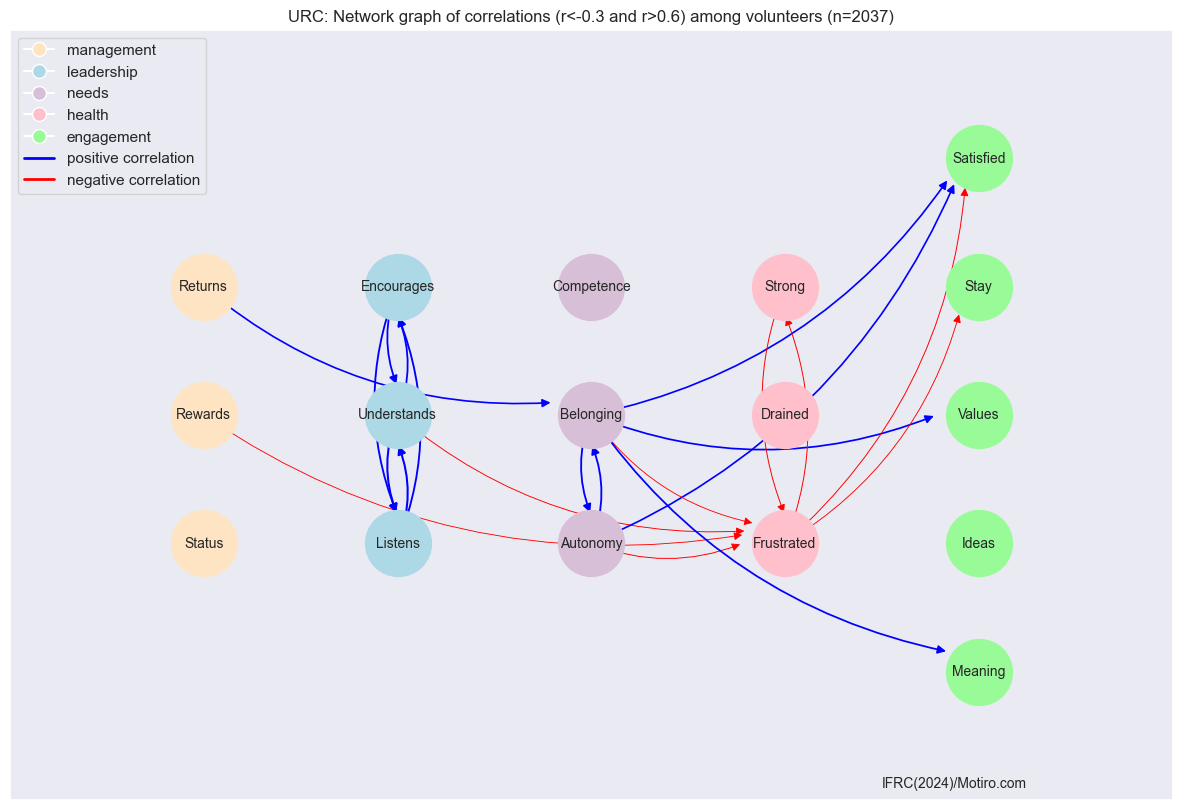

In [64]:
## VOLUNTEERS Ukraine Red Cross Correlations network graph key variables on horizontal axis
import networkx as nx
import matplotlib
#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import math

#set correlation coefficient thresholds for graph
negcorr = -0.3
poscorr = 0.6

df = pd.read_csv("URC_ALL.csv", sep=",", encoding='utf-8')

# Filter the dataframe for 'Position' = 'Volunteer'
df = df[df['Position'] == 'Volunteer']
#df = df[df['frontline'] == 'Frontline']
#df = df[df['region'] == 'Donetsk Region']

# Count the total number of teams in filtered dataframe (n)
n = df['Volunteer'].sum()

# Compute correlation matrix with numeric_only set to True to avoid warning
corr_matrix = df.corr(numeric_only=True)


# Define variable sets
management_vars = ['Status', 'Rewards', 'Returns']
leadership_vars = ['Listens', 'Understands', 'Encourages']
needs_vars = ['Autonomy', 'Belonging', 'Competence']
health_vars = ['Frustrated', 'Drained', 'Strong']
engagement_vars = ['Meaning', 'Ideas', 'Values', 'Stay', 'Satisfied']

all_vars = management_vars + leadership_vars + needs_vars + health_vars + engagement_vars

# Create the graph
G = nx.DiGraph()

# Define variable colors
colors = {
    'management_vars': 'bisque',
    'leadership_vars': 'lightblue',
    'needs_vars': 'thistle',
    'health_vars': 'pink',
    'engagement_vars': 'palegreen'
}

# Modify the node addition part to include the color attribute
for var in all_vars:
    node_size = sum(corr_matrix[var])  # Sum of correlation coefficients
    if var in management_vars:
        node_color = colors['management_vars']
    elif var in leadership_vars:
        node_color = colors['leadership_vars']
    elif var in needs_vars:
        node_color = colors['needs_vars']
    elif var in health_vars:
        node_color = colors['health_vars']
    else:
        node_color = colors['engagement_vars']
    G.add_node(var, size=node_size, color=node_color)
    

# adjust arrows so that they touch circle periphery and are not hidden by the nodes' colored circle

def adjust_line_to_circle(x1, y1, x2, y2, r):
    """
    Adjusts the line segment (x1, y1) to (x2, y2) to stop at the circumference of a circle of radius r centered at (x2, y2).
    """
    angle = math.atan2(y2 - y1, x2 - x1)
    x2_new = x2 - r * math.cos(angle)
    y2_new = y2 - r * math.sin(angle)
    return x1, y1, x2_new, y2_new

# Add edges with color and weight attributes
for var1 in all_vars:
    for var2 in all_vars:
        correlation = corr_matrix[var1][var2]
        if var1 != var2 and not np.isnan(correlation) and (correlation > poscorr or correlation < negcorr):
            weight = abs(correlation)
            color = 'blue' if correlation > 0 else 'red'
            
            # Define the direction based on variable sets
            if var1 in management_vars and (var2 in needs_vars or var2 in health_vars or var2 in engagement_vars):
                G.add_edge(var1, var2, weight=weight, color=color)
            elif var1 in leadership_vars and (var2 in needs_vars or var2 in health_vars or var2 in engagement_vars):
                G.add_edge(var1, var2, weight=weight, color=color)
            elif var1 in needs_vars and (var2 in health_vars or var2 in engagement_vars):
                G.add_edge(var1, var2, weight=weight, color=color)
            elif var1 in management_vars and (var2 in health_vars or var2 in engagement_vars):
                G.add_edge(var1, var2, weight=weight, color=color)
            elif var1 in leadership_vars and (var2 in health_vars or var2 in engagement_vars):
                G.add_edge(var1, var2, weight=weight, color=color)
            elif var1 in health_vars and var2 in engagement_vars:
                G.add_edge(var1, var2, weight=weight, color=color)
            elif set([var1, var2]).issubset(set(management_vars)) or \
                 set([var1, var2]).issubset(set(leadership_vars)) or \
                 set([var1, var2]).issubset(set(needs_vars)) or \
                 set([var1, var2]).issubset(set(health_vars)) or \
                 set([var1, var2]).issubset(set(engagement_vars)):
                # Only add bidirectional arrows if they're in the same set
                G.add_edge(var1, var2, weight=weight, color=color)
                G.add_edge(var2, var1, weight=weight, color=color)

# Create positions for nodes
positions = {}
spacing_h = 1
spacing_v = 1

# Compute maximum group length for vertical centering
max_len = max(map(len, [management_vars, leadership_vars, needs_vars, health_vars, engagement_vars]))

for i, group in enumerate([management_vars, leadership_vars, needs_vars, health_vars, engagement_vars]):
    # Compute the starting y-coordinate for this group
    start_y = (max_len - len(group)) * spacing_v / 2
    
    for j, var in enumerate(group):
        positions[var] = (i * spacing_h, start_y + j * spacing_v)

for node, attributes in G.nodes(data=True):
    if np.isnan(attributes['size']):
        G.nodes[node]['size'] = 75  # Set default size

for node, data in G.nodes(data=True):
    print(node, data)

# Dummy lines for the legend
from matplotlib.lines import Line2D
legend_elements = []

# Adding legend for nodes
for label, color in colors.items():
    legend_elements.append(Line2D([0], [0], marker='o', color='w', label=label.replace('_vars', ''), markersize=10, markerfacecolor=color))

# Adding legend for edges
legend_elements.append(Line2D([0], [0], color='blue', lw=2, label='positive correlation'))
legend_elements.append(Line2D([0], [0], color='red', lw=2, label='negative correlation'))

# Plotting
fig, ax = plt.subplots(figsize=(15, 10))

# Modify the Draw nodes part to use the color from the node attributes
for node, (x, y) in positions.items():
    node_color = G.nodes[node]['color']
    ax.scatter(x, y, s=G.nodes[node]['size'] * 30, c=node_color, zorder=2)
    ax.text(x, y, node, ha='center', va='center', fontsize=10, zorder=3)

# Draw edges with a slight curve using connectionstyle
for u, v, data in G.edges(data=True):
    x1, y1 = positions[u]
    x2, y2 = positions[v]
    
    # Adjust end of arrow to connect to the node circle's periphery
    node_radius = math.sqrt(G.nodes[v]['size'] * 0.002 / math.pi)
    x1, y1, x2, y2 = adjust_line_to_circle(x1, y1, x2, y2, node_radius)

    arrowprops = dict(arrowstyle='-|>', linewidth=data['weight'] * 2, color=data['color'], 
                      connectionstyle="arc3,rad=0.2")  # Adding a curve
    plt.annotate("", xy=(x2, y2), xytext=(x1, y1), arrowprops=arrowprops, zorder=1)

# Add the legend to the plot
ax.legend(handles=legend_elements, loc='upper left')

plt.title(f'URC: Network graph of correlations (r<{negcorr} and r>{poscorr}) among volunteers (n={n})')
plt.text(3.5, -0.9, "IFRC(2024)/Motiro.com", size=10)
plt.xlim(-1, len([management_vars, leadership_vars, needs_vars, health_vars, engagement_vars]))
plt.ylim(-1, max_len)  # Using max_len for the ylim

# Remove x and y ticks
ax.set_xticks([])
ax.set_yticks([])
plt.savefig('URC VOL SDTCorrNetworkGraph.png', bbox_inches='tight', pad_inches=0.1)
plt.show()


Status {'size': 75, 'color': 'bisque'}
Rewards {'size': 75, 'color': 'bisque'}
Returns {'size': 75, 'color': 'bisque'}
Listens {'size': 75, 'color': 'lightblue'}
Understands {'size': 75, 'color': 'lightblue'}
Encourages {'size': 75, 'color': 'lightblue'}
Autonomy {'size': 75, 'color': 'thistle'}
Belonging {'size': 75, 'color': 'thistle'}
Competence {'size': 75, 'color': 'thistle'}
Frustrated {'size': 75, 'color': 'pink'}
Drained {'size': 75, 'color': 'pink'}
Strong {'size': 75, 'color': 'pink'}
Meaning {'size': 75, 'color': 'palegreen'}
Ideas {'size': 75, 'color': 'palegreen'}
Values {'size': 75, 'color': 'palegreen'}
Stay {'size': 75, 'color': 'palegreen'}
Satisfied {'size': 75, 'color': 'palegreen'}


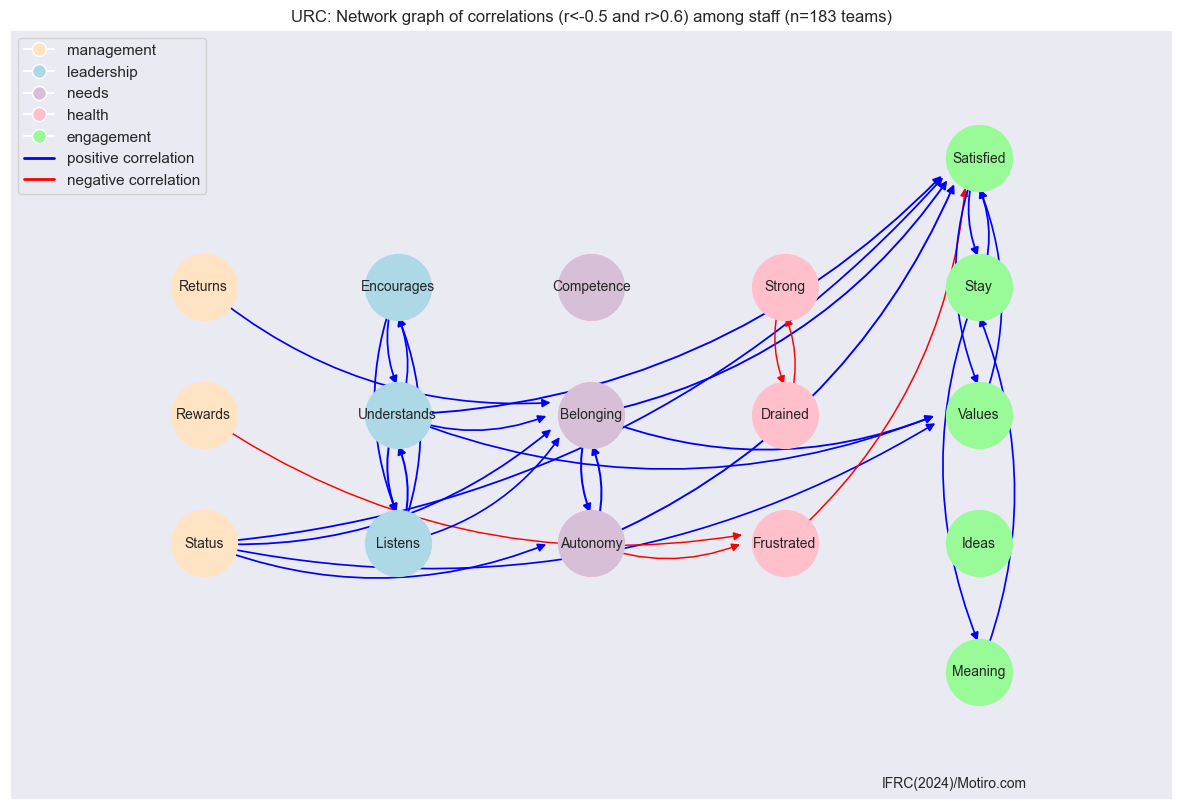

In [65]:
## STAFF Ukraine Red Cross Correlations network graph key variables on horizontal axis
import networkx as nx
import matplotlib
#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import math

#set correlation coefficient thresholds for graph
negcorr = -0.5
poscorr = 0.6

df = pd.read_csv("URC_ALL.csv")

# Filter the dataframe for 'Position' = 'Volunteer'
df = df[df['Position'] == 'Staff']
df = df[df['frontline'] == 'Frontline']
#df = df[df['region'] == 'Donetsk Region']

# Count the total number of teams in filtered dataframe (n)
n = df['Staff'].sum()

# Compute correlation matrix with numeric_only set to True to avoid warning
corr_matrix = df.corr(numeric_only=True)


# Define variable sets
management_vars = ['Status', 'Rewards', 'Returns']
leadership_vars = ['Listens', 'Understands', 'Encourages']
needs_vars = ['Autonomy', 'Belonging', 'Competence']
health_vars = ['Frustrated', 'Drained', 'Strong']
engagement_vars = ['Meaning', 'Ideas', 'Values', 'Stay', 'Satisfied']

all_vars = management_vars + leadership_vars + needs_vars + health_vars + engagement_vars

# Create the graph
G = nx.DiGraph()

# Define variable colors
colors = {
    'management_vars': 'bisque',
    'leadership_vars': 'lightblue',
    'needs_vars': 'thistle',
    'health_vars': 'pink',
    'engagement_vars': 'palegreen'
}

# Modify the node addition part to include the color attribute
for var in all_vars:
    node_size = sum(corr_matrix[var])  # Sum of correlation coefficients
    if var in management_vars:
        node_color = colors['management_vars']
    elif var in leadership_vars:
        node_color = colors['leadership_vars']
    elif var in needs_vars:
        node_color = colors['needs_vars']
    elif var in health_vars:
        node_color = colors['health_vars']
    else:
        node_color = colors['engagement_vars']
    G.add_node(var, size=node_size, color=node_color)
    

# adjust arrows so that they touch circle periphery and are not hidden by the nodes' colored circle

def adjust_line_to_circle(x1, y1, x2, y2, r):
    """
    Adjusts the line segment (x1, y1) to (x2, y2) to stop at the circumference of a circle of radius r centered at (x2, y2).
    """
    angle = math.atan2(y2 - y1, x2 - x1)
    x2_new = x2 - r * math.cos(angle)
    y2_new = y2 - r * math.sin(angle)
    return x1, y1, x2_new, y2_new

# Add edges with color and weight attributes
for var1 in all_vars:
    for var2 in all_vars:
        correlation = corr_matrix[var1][var2]
        if var1 != var2 and not np.isnan(correlation) and (correlation > poscorr or correlation < negcorr):
            weight = abs(correlation)
            color = 'blue' if correlation > 0 else 'red'
            
            # Define the direction based on variable sets
            if var1 in management_vars and (var2 in needs_vars or var2 in health_vars or var2 in engagement_vars):
                G.add_edge(var1, var2, weight=weight, color=color)
            elif var1 in leadership_vars and (var2 in needs_vars or var2 in health_vars or var2 in engagement_vars):
                G.add_edge(var1, var2, weight=weight, color=color)
            elif var1 in needs_vars and (var2 in health_vars or var2 in engagement_vars):
                G.add_edge(var1, var2, weight=weight, color=color)
            elif var1 in management_vars and (var2 in health_vars or var2 in engagement_vars):
                G.add_edge(var1, var2, weight=weight, color=color)
            elif var1 in leadership_vars and (var2 in health_vars or var2 in engagement_vars):
                G.add_edge(var1, var2, weight=weight, color=color)
            elif var1 in health_vars and var2 in engagement_vars:
                G.add_edge(var1, var2, weight=weight, color=color)
            elif set([var1, var2]).issubset(set(management_vars)) or \
                 set([var1, var2]).issubset(set(leadership_vars)) or \
                 set([var1, var2]).issubset(set(needs_vars)) or \
                 set([var1, var2]).issubset(set(health_vars)) or \
                 set([var1, var2]).issubset(set(engagement_vars)):
                # Only add bidirectional arrows if they're in the same set
                G.add_edge(var1, var2, weight=weight, color=color)
                G.add_edge(var2, var1, weight=weight, color=color)

# Create positions for nodes
positions = {}
spacing_h = 1
spacing_v = 1

# Compute maximum group length for vertical centering
max_len = max(map(len, [management_vars, leadership_vars, needs_vars, health_vars, engagement_vars]))

for i, group in enumerate([management_vars, leadership_vars, needs_vars, health_vars, engagement_vars]):
    # Compute the starting y-coordinate for this group
    start_y = (max_len - len(group)) * spacing_v / 2
    
    for j, var in enumerate(group):
        positions[var] = (i * spacing_h, start_y + j * spacing_v)

for node, attributes in G.nodes(data=True):
    if np.isnan(attributes['size']):
        G.nodes[node]['size'] = 75  # Set default size

for node, data in G.nodes(data=True):
    print(node, data)

# Dummy lines for the legend
from matplotlib.lines import Line2D
legend_elements = []

# Adding legend for nodes
for label, color in colors.items():
    legend_elements.append(Line2D([0], [0], marker='o', color='w', label=label.replace('_vars', ''), markersize=10, markerfacecolor=color))

# Adding legend for edges
legend_elements.append(Line2D([0], [0], color='blue', lw=2, label='positive correlation'))
legend_elements.append(Line2D([0], [0], color='red', lw=2, label='negative correlation'))

# Plotting
fig, ax = plt.subplots(figsize=(15, 10))

# Modify the Draw nodes part to use the color from the node attributes
for node, (x, y) in positions.items():
    node_color = G.nodes[node]['color']
    ax.scatter(x, y, s=G.nodes[node]['size'] * 30, c=node_color, zorder=2)
    ax.text(x, y, node, ha='center', va='center', fontsize=10, zorder=3)

# Draw edges with a slight curve using connectionstyle
for u, v, data in G.edges(data=True):
    x1, y1 = positions[u]
    x2, y2 = positions[v]
    
    # Adjust end of arrow to connect to the node circle's periphery
    node_radius = math.sqrt(G.nodes[v]['size'] * 0.002 / math.pi)
    x1, y1, x2, y2 = adjust_line_to_circle(x1, y1, x2, y2, node_radius)

    arrowprops = dict(arrowstyle='-|>', linewidth=data['weight'] * 2, color=data['color'], 
                      connectionstyle="arc3,rad=0.2")  # Adding a curve
    plt.annotate("", xy=(x2, y2), xytext=(x1, y1), arrowprops=arrowprops, zorder=1)

# Add the legend to the plot
ax.legend(handles=legend_elements, loc='upper left')

plt.title(f'URC: Network graph of correlations (r<{negcorr} and r>{poscorr}) among staff (n={n} teams)')
plt.text(3.5, -0.9, "IFRC(2024)/Motiro.com", size=10)
plt.xlim(-1, len([management_vars, leadership_vars, needs_vars, health_vars, engagement_vars]))
plt.ylim(-1, max_len)  # Using max_len for the ylim

# Remove x and y ticks
ax.set_xticks([])
ax.set_yticks([])
plt.savefig('URC STAFF SDTCorrNetworkGraph.png', bbox_inches='tight', pad_inches=0.1)
plt.show()
